# Dataset 2: Student Mental Health and Help Seeking Behaviors

# Import Neccessary Libraries

In [1]:
# !pip install threadpoolctl --upgrade
# !pip install -U scikit-learn

In [2]:
import pandas as pd
from pprint import pprint
from sharedFunctions import *
from models import *

# Import Dataset

In [3]:
df2 = pd.read_csv('dataset\students_mental_health_and_help-seeking_behaviors_dataset.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   Region           268 non-null    object 
 2   Gender           268 non-null    object 
 3   Academic         268 non-null    object 
 4   Age              268 non-null    int64  
 5   Age_cate         268 non-null    int64  
 6   Stay             268 non-null    int64  
 7   Stay_Cate        268 non-null    object 
 8   Japanese         268 non-null    int64  
 9   Japanese_cate    268 non-null    object 
 10  English          268 non-null    int64  
 11  English_cate     268 non-null    object 
 12  Intimate         260 non-null    object 
 13  Religion         268 non-null    object 
 14  Suicide          268 non-null    object 
 15  Dep              268 non-null    object 
 16  DepType          268 non-null    object 
 17  ToDep           

In [4]:
df2.head()

inter_dom Region  Gender Academic  Age  Age_cate  Stay Stay_Cate  Japanese  \
0     Inter    SEA    Male     Grad   24         4     5      Long         3   
1     Inter    SEA    Male     Grad   28         5     1     Short         4   
2     Inter    SEA    Male     Grad   25         4     6      Long         4   
3     Inter     EA  Female     Grad   29         5     1     Short         2   
4     Inter     EA  Female     Grad   28         5     1     Short         1   

  Japanese_cate  ...  Friends_bi Parents_bi Relative_bi Professional_bi  \
0       Average  ...         Yes        Yes          No              No   
1          High  ...         Yes        Yes          No              No   
2          High  ...          No         No          No              No   
3           Low  ...         Yes        Yes         Yes             Yes   
4           Low  ...         Yes        Yes          No             Yes   

  Phone_bi Doctor_bi religion_bi  Alone_bi Others_bi  Internet_bi  
0       No        No          No        No        No           No  
1       No        No          No        No        No           No  
2       No        No          No        No        No           No  
3       No        No          No        No        No           No  
4       No       Yes         Yes        No        No           No  

[5 rows x 50 columns]

In [5]:
# For visualization Purpose
df2_origin = df2.copy()

# Handling Missing Values

In [6]:
print_unique_values_for_object_columns(df2)

inter_dom : ['Inter' 'Dom']
Region : ['SEA' 'EA' 'SA' 'Others' 'JAP']
Gender : ['Male' 'Female']
Academic : ['Grad' 'Under']
Stay_Cate : ['Long' 'Short' 'Medium']
Japanese_cate : ['Average' 'High' 'Low']
English_cate : ['High' 'Average' 'Low']
Intimate : [nan 'Yes' 'No']
Religion : ['Yes' 'No']
Suicide : ['No' 'Yes']
Dep : ['No' 'Yes']
DepType : ['No' 'Other' 'Major']
DepSev : ['Min' 'Mild' 'Mod' 'ModSev' 'Sev']
Partner_bi : ['Yes' 'No']
Friends_bi : ['Yes' 'No']
Parents_bi : ['Yes' 'No']
Relative_bi : ['No' 'Yes']
Professional_bi : ['No' 'Yes']
Phone_bi : ['No' 'Yes']
Doctor_bi : ['No' 'Yes']
religion_bi : ['No' 'Yes']
Alone_bi : ['No' 'Yes']
Others_bi : ['No' 'Yes']
Internet_bi : ['No' 'Yes']


In [7]:
df2.isnull().sum()

inter_dom           0
Region              0
Gender              0
Academic            0
Age                 0
Age_cate            0
Stay                0
Stay_Cate           0
Japanese            0
Japanese_cate       0
English             0
English_cate        0
Intimate            8
Religion            0
Suicide             0
Dep                 0
DepType             0
ToDep               0
DepSev              0
ToSC                0
APD                 0
AHome               0
APH                 0
Afear               0
ACS                 0
AGuilt              0
AMiscell            0
ToAS                0
Partner             0
Friends             0
Parents             0
Relative            0
Profess             0
 Phone              0
Doctor              0
Reli                0
Alone               0
Others              0
Internet           26
Partner_bi          0
Friends_bi          0
Parents_bi          0
Relative_bi         0
Professional_bi     0
Phone_bi            0
Doctor_bi 

In [8]:
df2.loc[:, 'Internet'] = df2['Internet'].fillna(df2['Internet'].mode()[0])
df2.loc[:, 'Intimate'] = df2['Intimate'].fillna(df2['Intimate'].mode()[0])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   Region           268 non-null    object 
 2   Gender           268 non-null    object 
 3   Academic         268 non-null    object 
 4   Age              268 non-null    int64  
 5   Age_cate         268 non-null    int64  
 6   Stay             268 non-null    int64  
 7   Stay_Cate        268 non-null    object 
 8   Japanese         268 non-null    int64  
 9   Japanese_cate    268 non-null    object 
 10  English          268 non-null    int64  
 11  English_cate     268 non-null    object 
 12  Intimate         268 non-null    object 
 13  Religion         268 non-null    object 
 14  Suicide          268 non-null    object 
 15  Dep              268 non-null    object 
 16  DepType          268 non-null    object 
 17  ToDep           

# Encoding

In [9]:
label_encode_columns = ["inter_dom", "Region", "Gender", "Academic", "DepType"]

# Call encoding function
df2 = encode_objectdtypes_columns(df2, label_encode_columns)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    int32  
 1   Region           268 non-null    int32  
 2   Gender           268 non-null    int32  
 3   Academic         268 non-null    int32  
 4   Age              268 non-null    int64  
 5   Age_cate         268 non-null    int64  
 6   Stay             268 non-null    int64  
 7   Stay_Cate        268 non-null    int64  
 8   Japanese         268 non-null    int64  
 9   Japanese_cate    268 non-null    int64  
 10  English          268 non-null    int64  
 11  English_cate     268 non-null    int64  
 12  Intimate         268 non-null    int64  
 13  Religion         268 non-null    int64  
 14  Suicide          268 non-null    int64  
 15  Dep              268 non-null    int64  
 16  DepType          268 non-null    int32  
 17  ToDep           

In [10]:
df2.isnull().sum()

inter_dom          0
Region             0
Gender             0
Academic           0
Age                0
Age_cate           0
Stay               0
Stay_Cate          0
Japanese           0
Japanese_cate      0
English            0
English_cate       0
Intimate           0
Religion           0
Suicide            0
Dep                0
DepType            0
ToDep              0
DepSev             0
ToSC               0
APD                0
AHome              0
APH                0
Afear              0
ACS                0
AGuilt             0
AMiscell           0
ToAS               0
Partner            0
Friends            0
Parents            0
Relative           0
Profess            0
 Phone             0
Doctor             0
Reli               0
Alone              0
Others             0
Internet           0
Partner_bi         0
Friends_bi         0
Parents_bi         0
Relative_bi        0
Professional_bi    0
Phone_bi           0
Doctor_bi          0
religion_bi        0
Alone_bi     

In [11]:
df2.select_dtypes(include=['object']).columns
df2['DepSev'].value_counts()

DepSev
1    107
2     73
0     65
3     15
4      8
Name: count, dtype: int64

In [12]:
df2.describe()

inter_dom      Region      Gender    Academic         Age    Age_cate  \
count  268.000000  268.000000  268.000000  268.000000  268.000000  268.000000   
mean     0.750000    2.361940    0.365672    0.921642   20.873134    2.559701   
std      0.433823    1.655647    0.482519    0.269237    2.765279    1.070624   
min      0.000000    0.000000    0.000000    0.000000   17.000000    1.000000   
25%      0.750000    1.000000    0.000000    1.000000   19.000000    2.000000   
50%      1.000000    3.000000    0.000000    1.000000   20.000000    2.000000   
75%      1.000000    4.000000    1.000000    1.000000   22.000000    3.000000   
max      1.000000    4.000000    1.000000    1.000000   31.000000    5.000000   

             Stay   Stay_Cate    Japanese  Japanese_cate  ...  Friends_bi  \
count  268.000000  268.000000  268.000000     268.000000  ...  268.000000   
mean     2.149254    0.690299    3.097015       0.981343  ...    0.477612   
std      1.326805    0.674009    1.306104       0.818574  ...    0.500433   
min      1.000000    0.000000    1.000000       0.000000  ...    0.000000   
25%      1.000000    0.000000    2.000000       0.000000  ...    0.000000   
50%      2.000000    1.000000    3.000000       1.000000  ...    0.000000   
75%      3.000000    1.000000    4.000000       2.000000  ...    1.000000   
max     10.000000    2.000000    5.000000       2.000000  ...    1.000000   

       Parents_bi  Relative_bi  Professional_bi    Phone_bi   Doctor_bi  \
count  268.000000   268.000000       268.000000  268.000000  268.000000   
mean     0.511194     0.246269         0.227612    0.111940    0.171642   
std      0.500810     0.431643         0.420075    0.315883    0.377774   
min      0.000000     0.000000         0.000000    0.000000    0.000000   
25%      0.000000     0.000000         0.000000    0.000000    0.000000   
50%      1.000000     0.000000         0.000000    0.000000    0.000000   
75%      1.000000     0.000000         0.000000    0.000000    0.000000   
max      1.000000     1.000000         1.000000    1.000000    1.000000   

       religion_bi    Alone_bi   Others_bi  Internet_bi  
count   268.000000  268.000000  268.000000   268.000000  
mean      0.070896    0.242537    0.078358     0.167910  
std       0.257130    0.429419    0.269237     0.374486  
min       0.000000    0.000000    0.000000     0.000000  
25%       0.000000    0.000000    0.000000     0.000000  
50%       0.000000    0.000000    0.000000     0.000000  
75%       0.000000    0.000000    0.000000     0.000000  
max       1.000000    1.000000    1.000000     1.000000  

[8 rows x 50 columns]

# Data Exploration

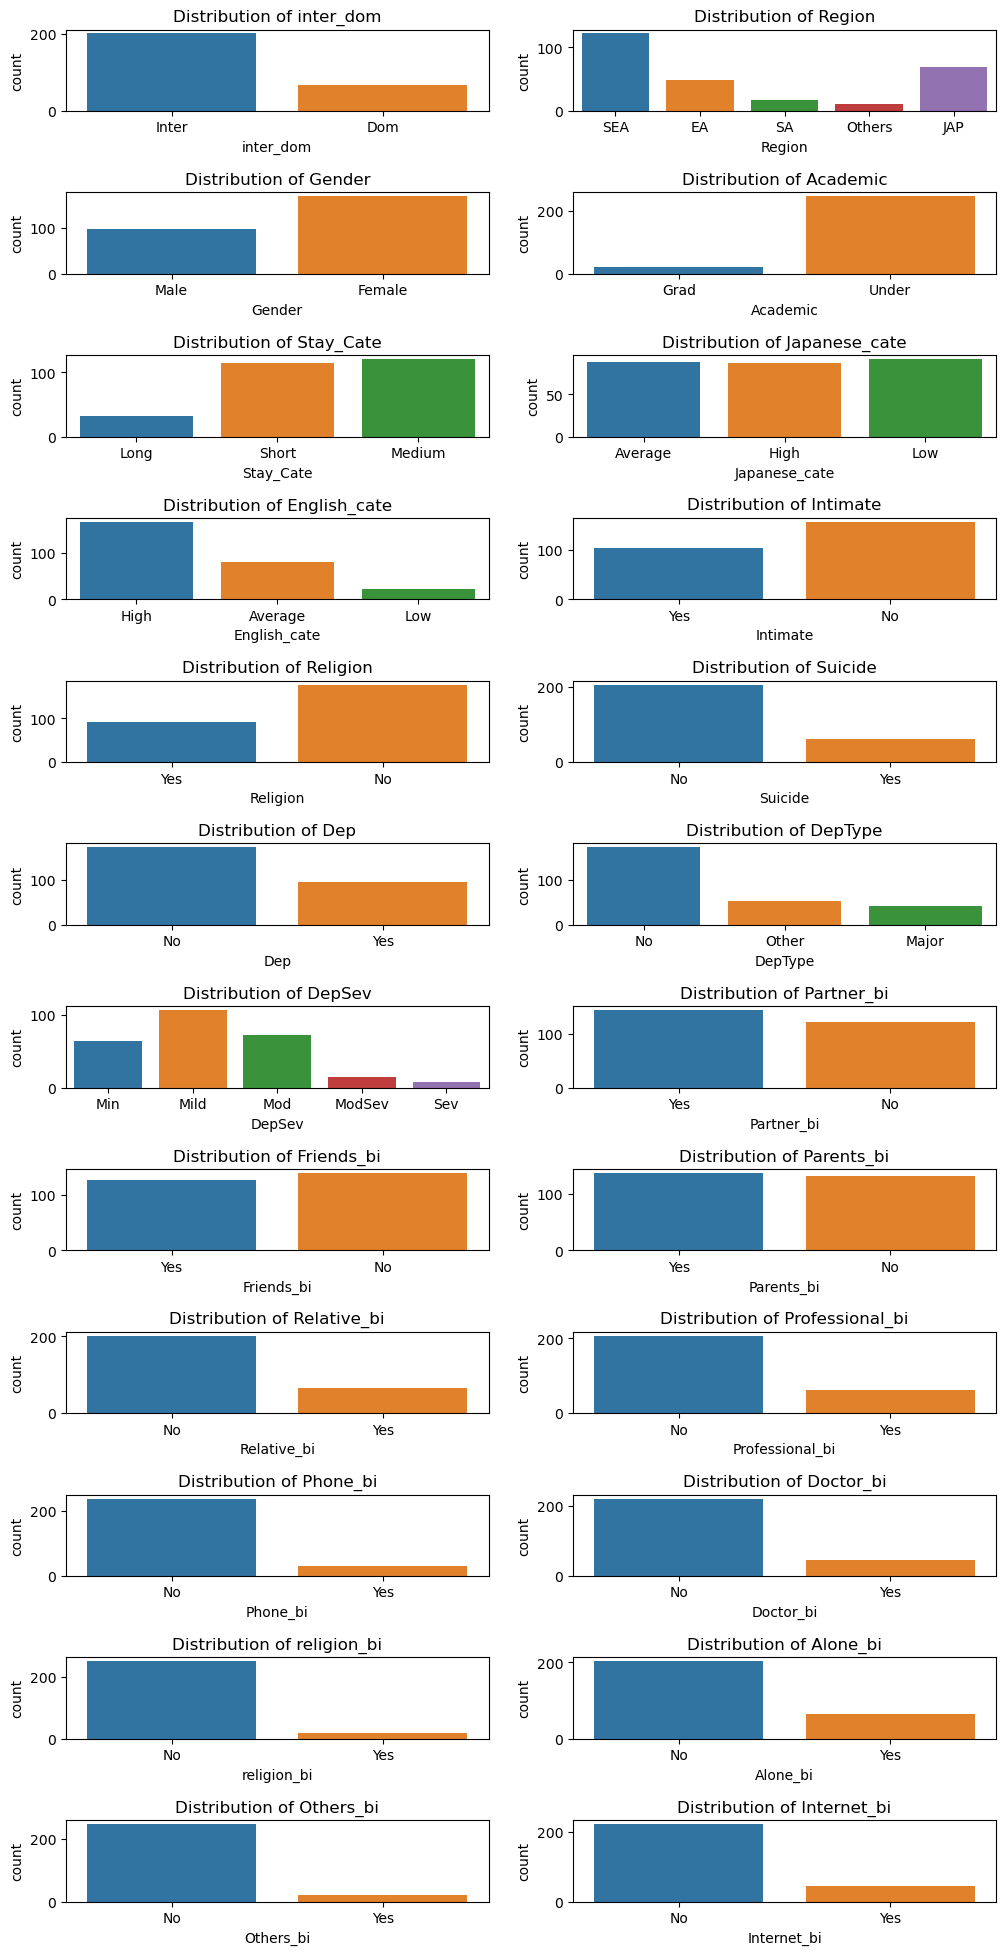

In [13]:
# plot catergorical data distribution
plot_categorical_columns(df2_origin, df2_origin.select_dtypes(include=['object']).columns.tolist())

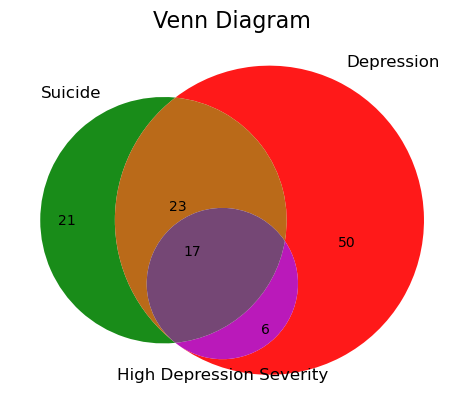

In [14]:
subset1 = set(df2[df2["Suicide"] == 1].index)
subset2 = set(df2[df2["Dep"] == 1].index)
subset3 = set(df2[df2["DepSev"] > 2].index)
plot_venn(subsets=[subset1, subset2,subset3], set_labels=("Suicide", "Depression", "High Depression Severity"),
set_colors=("Green", "Red", "Blue"))

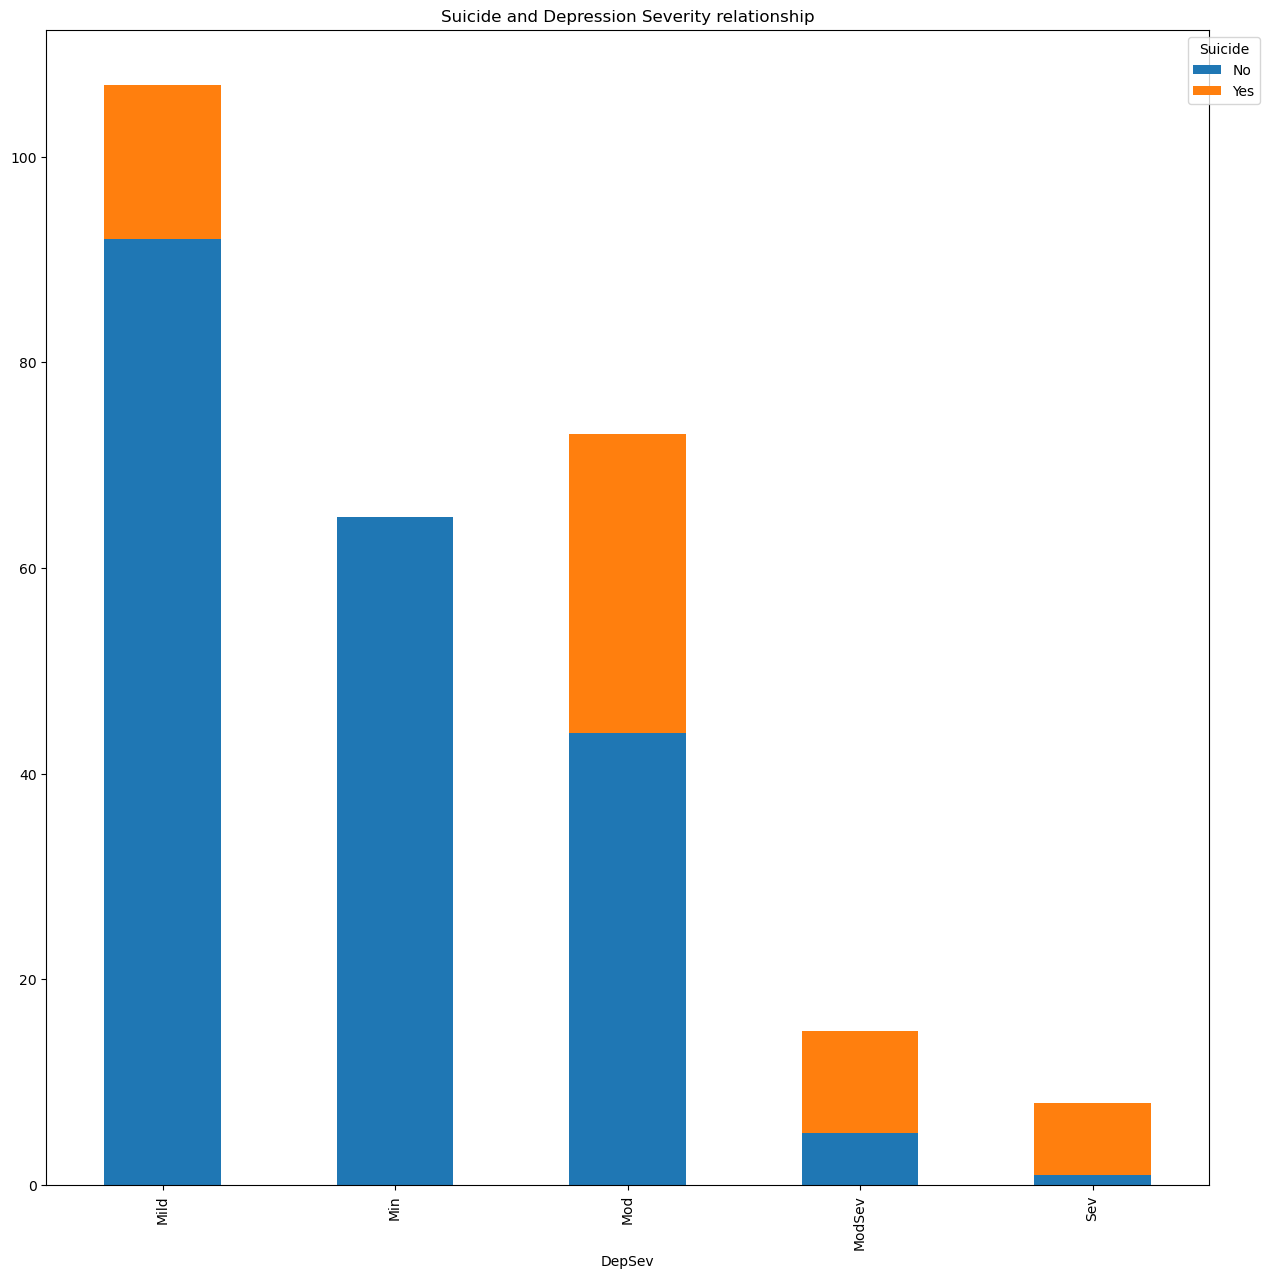

In [15]:
plot_stacking_bars(df2_origin, 'DepSev', 'Suicide', title = 'Suicide and Depression Severity relationship')

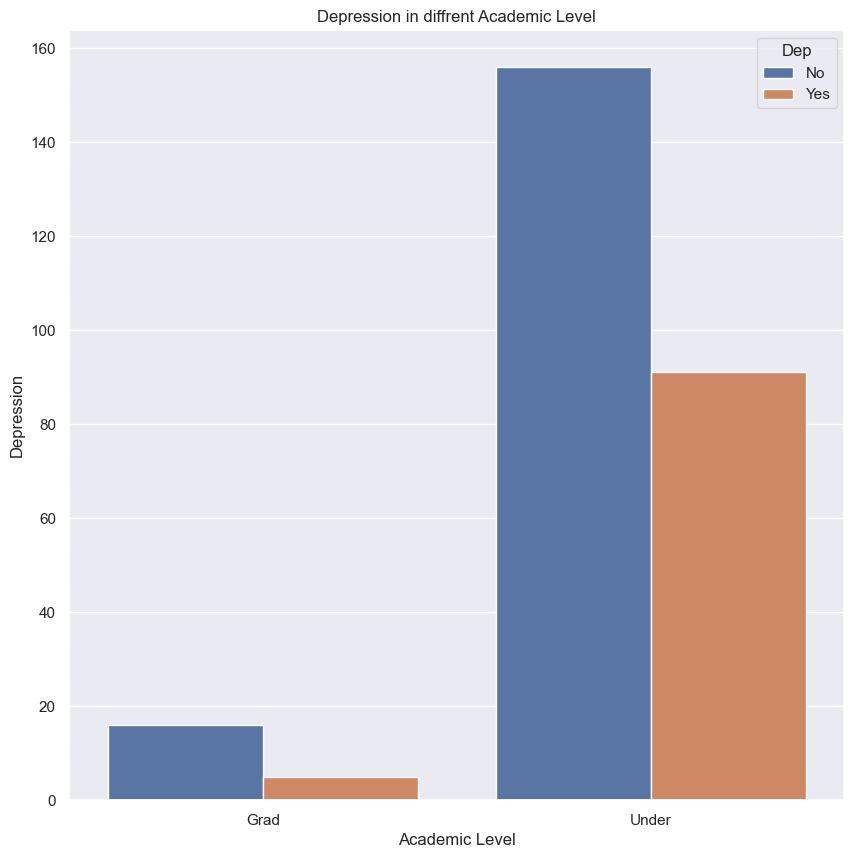

In [16]:
plot_comparison_student(df2_origin, 'Academic', 'Dep', title = 'Depression in diffrent Academic Level', xlabel = 'Academic Level', ylabel = 'Depression')

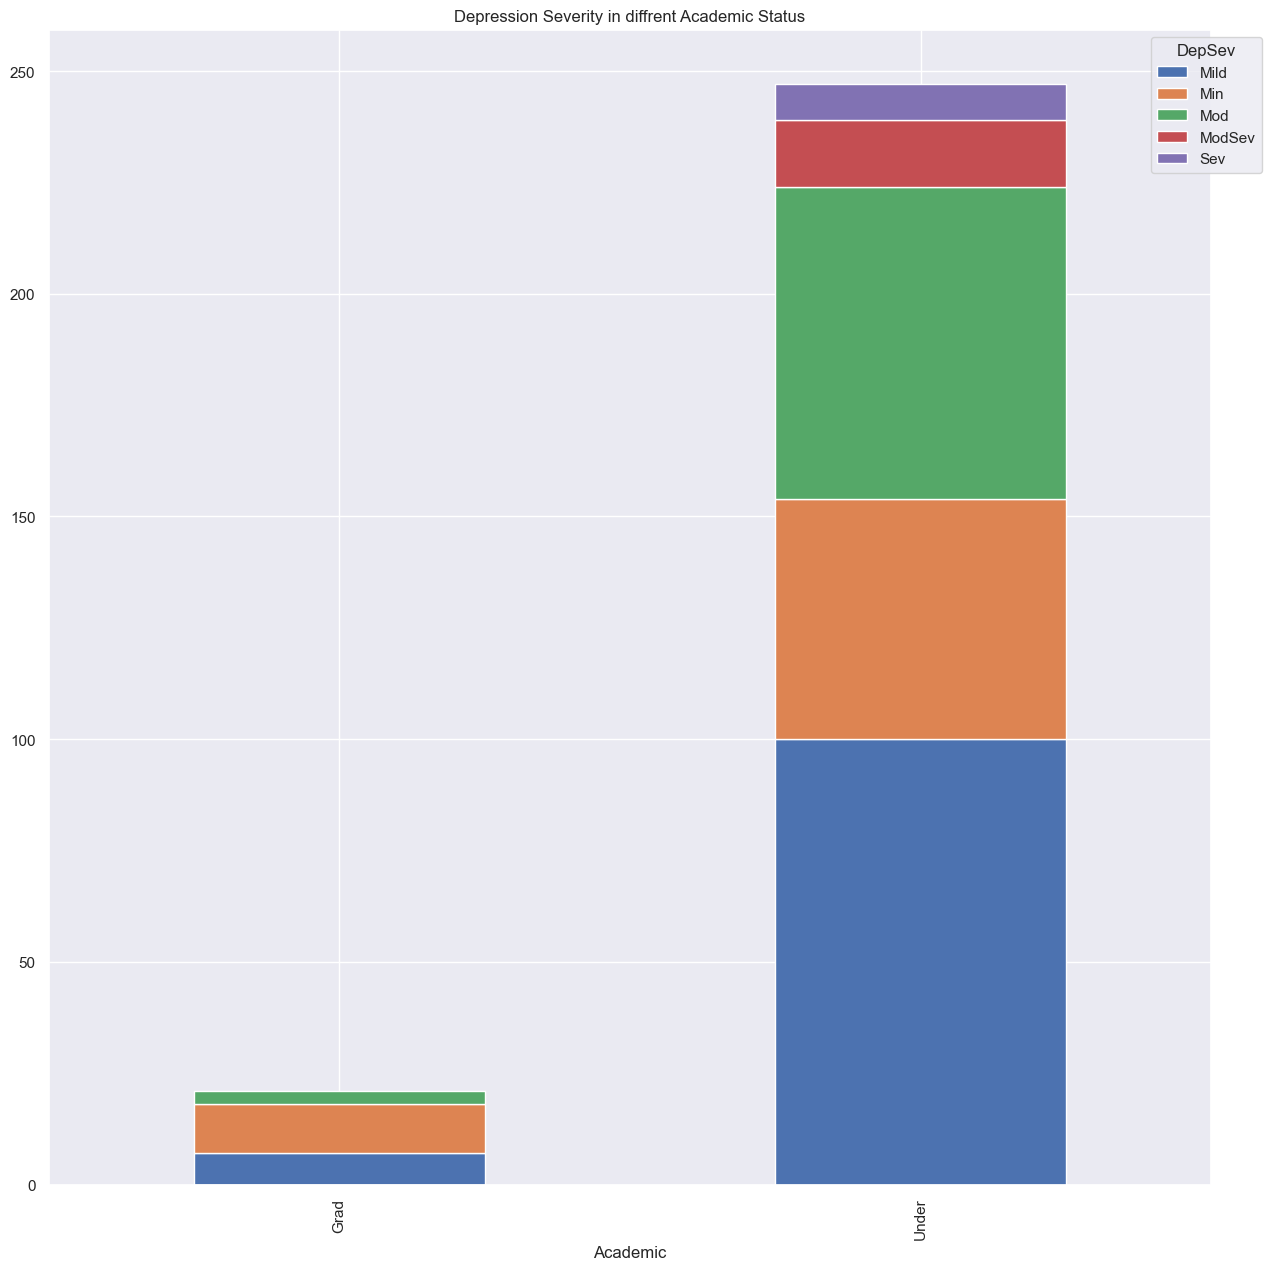

In [17]:
plot_stacking_bars(df2_origin, 'Academic', 'DepSev', title='Depression Severity in diffrent Academic Status')

# Classification Models Array

## Define Models
* `class_distribution` - Plot to check is data is balanced
* `split_data` - Split the data, return **X_train, X_test, X_valid, y_train, y_test, y_valid**
* `SMOTE_resample` - Handle imbalanced data, return **X_res_df** resampled data
* `cnn_classifier_hp`  - CNN, return **model, prediction**
* `dnn_classifier_hp` - DNN, return **model, prediction**
* `rnn_classifier_hp` - RNN, return **model, prediction**
* `mlp_classifier_hp` - MLP, return **model, prediction**
* `rf_classifier` - RF, return **model, prediction**
* `xgb_classifier` - XGBoost, return **model, prediction**
* `catboost_classifier` - Catboost, return **model, prediction**
* `soft_sv_classifier` - Soft Voting, return **model, prediction**

In [18]:
# Initialize a dictionary to store the predictions with classifier names and dataset number
predictions = {
    1: {  # Dataset 1
        'Depression': [],
        'Anxiety': [],
        'Panic_Attack': []
    },
    2: {  # Dataset 2
        'Suicide': [],
        'Depression': [],
        'Depression_Severity': []
    }
}

# Target columns:
*   Suicide
*   Depression
*   Depression Severity

## Suicide as Target

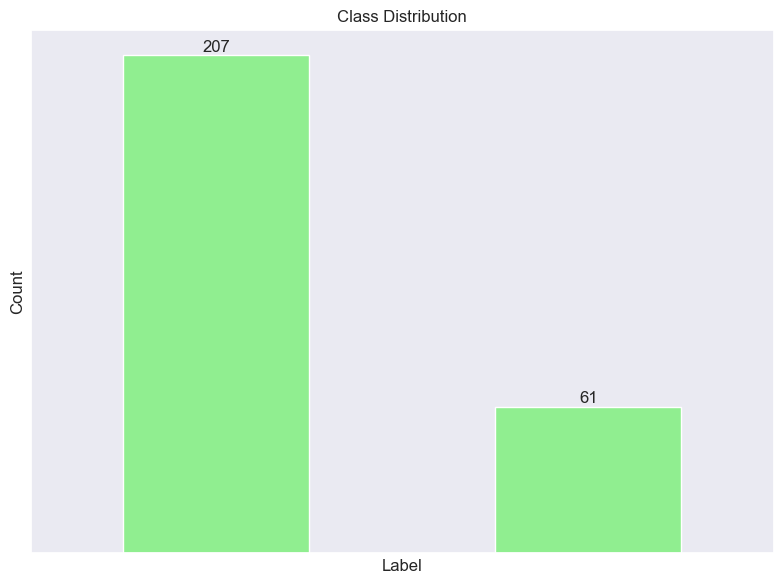

In [19]:
class_distribution(df2, 'Suicide')

In [20]:
df2.DepSev.value_counts()

DepSev
1    107
2     73
0     65
3     15
4      8
Name: count, dtype: int64

In [21]:
suicide_df2 = SMOTE_resample(df2, 'Suicide')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(suicide_df2, 'Suicide')

(248, 49)
(248,)
(83, 49)
(83,)
(83, 49)
(83,)


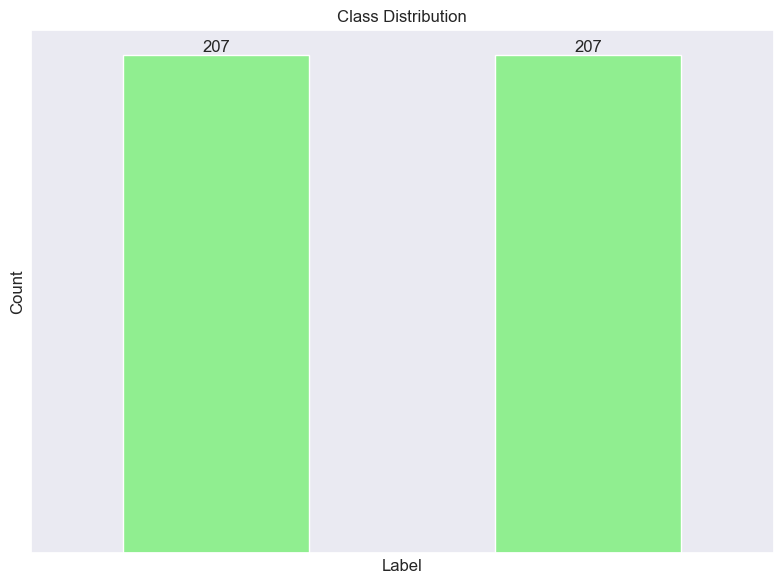

In [22]:
class_distribution(suicide_df2, 'Suicide')

### Deep Learning

In [23]:
# CNN Suicide

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
])

cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6025 - loss: 0.6553 - val_accuracy: 0.7590 - val_loss: 0.4768
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7944 - loss: 0.4313 - val_accuracy: 0.7952 - val_loss: 0.4344
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8030 - loss: 0.4277 - val_accuracy: 0.7470 - val_loss: 0.4695
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8084 - loss: 0.4394 - val_accuracy: 0.8434 - val_loss: 0.3794
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8736 - loss: 0.3175 - val_accuracy: 0.7711 - val_loss: 0.4646
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8712 - loss: 0.3525 - val_accuracy: 0.8795 - val_loss: 0.3394
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8725 - loss: 0.3327 - val_accuracy: 0.8554 - val_loss: 0.4233
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8405 - loss: 0.3106 - val_accuracy: 0.8916 - val_loss: 0.3803

In [24]:
# CNN Hyperparameter tuning - Suicide
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\cnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4210 - loss: 0.8684 - val_accuracy: 0.6747 - val_loss: 0.7377
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7707 - loss: 0.6764 - val_accuracy: 0.7831 - val_loss: 0.5916
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8083 - loss: 0.5306 - val_accuracy: 0.7831 - val_loss: 0.5688
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8087 - loss: 0.5227 - val_accuracy: 0.8072 - val_loss: 0.5607
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8409 - loss: 0.4417 - val_accuracy: 0.8434 - val_loss: 0.4644
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8453 - loss: 0.3895 - val_accuracy: 0.8193 - val_loss: 0.4746
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8408 - loss: 0.4148 - val_accuracy: 0.8434 - val_loss: 0.4246
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8892

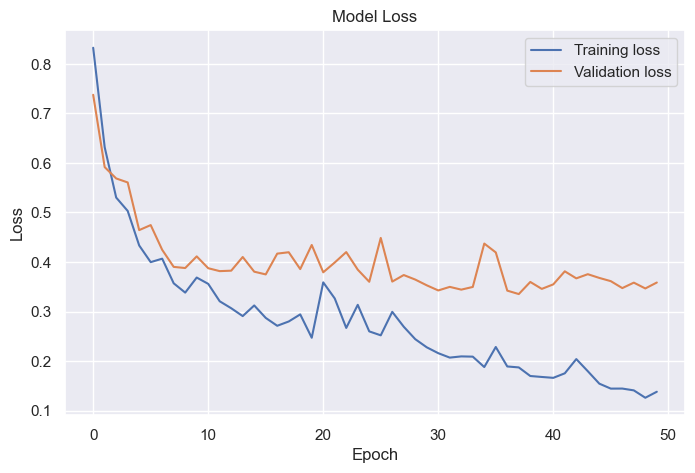

In [25]:
plot_history(cnn_hist)

In [26]:
# DNN Suicide

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=64, activation='tanh', return_sequences=True),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(64, activation='relu'), !! no need last layer
])

dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5757 - loss: 0.6725 - val_accuracy: 0.7349 - val_loss: 0.5834
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7974 - loss: 0.5270 - val_accuracy: 0.7470 - val_loss: 0.5036
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7628 - loss: 0.4394 - val_accuracy: 0.7711 - val_loss: 0.4942
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8346 - loss: 0.3674 - val_accuracy: 0.7711 - val_loss: 0.4784
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8127 - loss: 0.3989 - val_accuracy: 0.8313 - val_loss: 0.4036
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8536 - loss: 0.3190 - val_accuracy: 0.8916 - val_loss: 0.3702
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8465 - loss: 0.3167 - val_accuracy: 0.8554 - val_loss: 0.3423
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8860 - loss: 0.2517 - val_accuracy: 0.8434 - val_loss:

In [27]:
# DNN Hyperparameter tuning - Suicide
dnn, best_param_dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\dnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5424 - loss: 1.3841 - val_accuracy: 0.4578 - val_loss: 1.2113
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6246 - loss: 1.0963 - val_accuracy: 0.7831 - val_loss: 0.9523
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8056 - loss: 0.8792 - val_accuracy: 0.5904 - val_loss: 0.9406
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7436 - loss: 0.7917 - val_accuracy: 0.7711 - val_loss: 0.7668
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8258 - loss: 0.6707 - val_accuracy: 0.8313 - val_loss: 0.6438
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8598 - loss: 0.6142 - val_accuracy: 0.8072 - val_loss: 0.6487
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8231 - loss: 0.6094 - val_accuracy: 0.8434 - val_loss: 0.6858
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy:

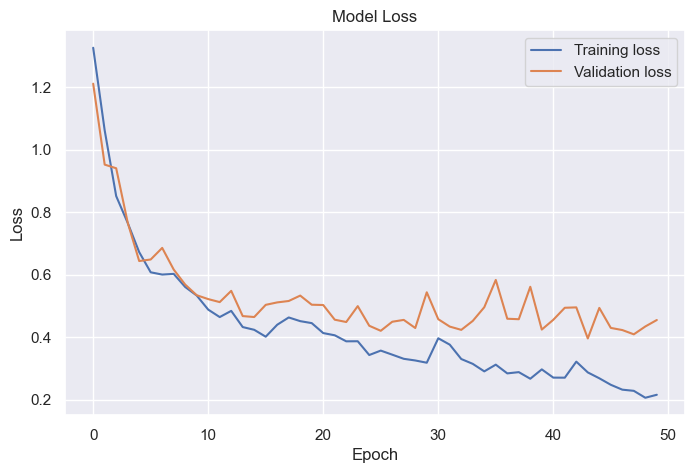

In [28]:
plot_history(dnn_hist)

In [29]:
# RNN Suicide

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
])

rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6776 - loss: 0.6653 - val_accuracy: 0.8193 - val_loss: 0.5850
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7518 - loss: 0.5841 - val_accuracy: 0.8193 - val_loss: 0.4919
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7339 - loss: 0.5571 - val_accuracy: 0.8193 - val_loss: 0.4715
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7758 - loss: 0.4876 - val_accuracy: 0.6265 - val_loss: 0.6129
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7419 - loss: 0.5519 - val_accuracy: 0.7711 - val_loss: 0.5187
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7520 - loss: 0.5503 - val_accuracy: 0.8313 - val_loss: 0.4831
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7181 - loss: 0.5623 - val_accuracy: 0.8072 - val_loss: 0.4428
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7817 - loss: 0.4883 - val_accuracy: 0.8193 - val_loss:

In [30]:
# RNN Hyperparameter tuning - Suicide
rnn, best_param_rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\rnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5530 - loss: 0.6799 - val_accuracy: 0.7952 - val_loss: 0.5720
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7345 - loss: 0.5917 - val_accuracy: 0.7831 - val_loss: 0.5171
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7526 - loss: 0.5602 - val_accuracy: 0.8193 - val_loss: 0.4792
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7941 - loss: 0.5188 - val_accuracy: 0.7711 - val_loss: 0.4633
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.5018 - val_accuracy: 0.8313 - val_loss: 0.4314
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8222 - loss: 0.4552 - val_accuracy: 0.7711 - val_loss: 0.4371
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.4661 - val_accuracy: 0.8313 - val_loss: 0.4246
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7507

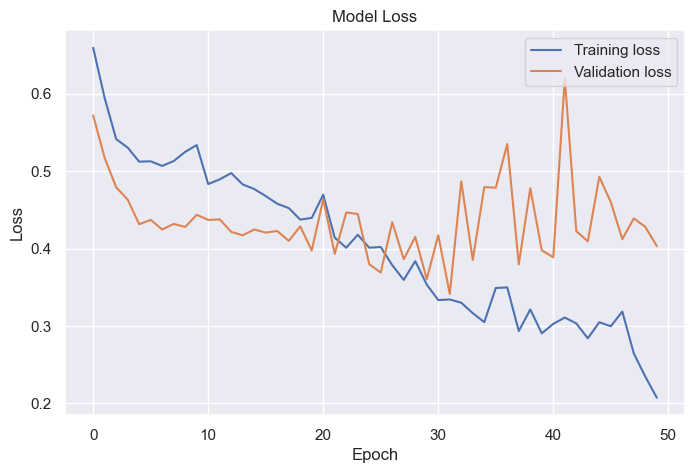

In [31]:
plot_history(rnn_hist)

In [32]:
# MLP Suicide

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
])

mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6967 - loss: 0.6755 - val_accuracy: 0.7349 - val_loss: 0.5874
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.5030 - val_accuracy: 0.7470 - val_loss: 0.5126
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4649 - val_accuracy: 0.8193 - val_loss: 0.4514
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.3403 - val_accuracy: 0.8313 - val_loss: 0.3810
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.3832 - val_accuracy: 0.8675 - val_loss: 0.3418
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8946 - loss: 0.3119 - val_accuracy: 0.7952 - val_loss: 0.4599
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3223 - val_accuracy: 0.8675 - val_loss: 0.3401
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.3033 - val_accuracy: 0.8675 - val_loss: 0.4227

In [33]:
# MLP Hyperparameter Tuning - Suicide
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\mlp_hyperparameter_tuning2\tuner0.json
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4930 - loss: 1.1962 - val_accuracy: 0.7108 - val_loss: 0.8452
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.6820 - val_accuracy: 0.8072 - val_loss: 0.5820
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8442 - loss: 0.5119 - val_accuracy: 0.7711 - val_loss: 0.5690
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.4919 - val_accuracy: 0.8193 - val_loss: 0.6097
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.4557 - val_accuracy: 0.8313 - val_loss: 0.5031
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8679 - loss: 0.4236 - val_accuracy: 0.8554 - val_loss: 0.4440
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8954 - loss: 0.3932 - val_accuracy: 0.8916 - val_loss: 0.4326
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9020

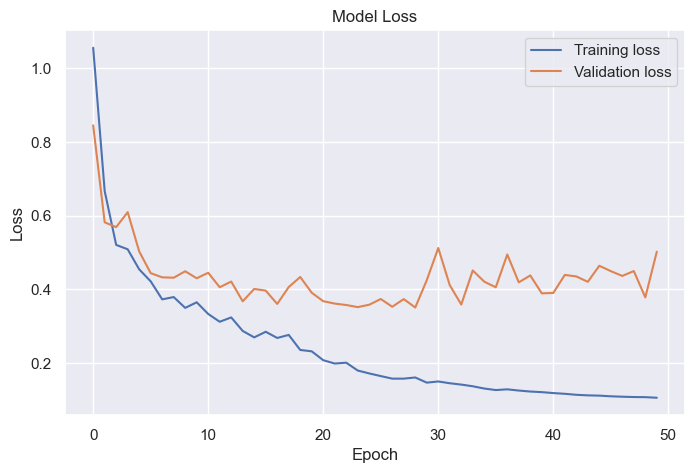

In [34]:
plot_history(mlp_hist)

### Ensemble Learning

In [35]:
# Random Forest Suicide
rf, y_pred_rf, rf_accuracy = random_forest_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.88      0.93      0.90        45

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83



In [36]:
# Hyperparameter Tuning for Random Forest - Suicide
param_grid_rf = {
    'n_estimators': [50, 100, 200 , 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': [5, 7, 9, 10],
    'random_state': [42, 101],
}

rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [37]:
# XGBoost Suicide
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        38
           1       0.83      0.89      0.86        45

    accuracy                           0.84        83
   macro avg       0.85      0.84      0.84        83
weighted avg       0.84      0.84      0.84        83



In [38]:
# Hyperparameter Tuning for XGBoost - Suicide
param_grid_xgb = {
    'n_estimators': [50, 100, 200 , 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'random_state': [42, 101],
}

xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [39]:
# Catboost Suicide
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.046921
0:	learn: 0.6487380	total: 135ms	remaining: 13.4s
1:	learn: 0.6116855	total: 137ms	remaining: 6.73s
2:	learn: 0.5809194	total: 140ms	remaining: 4.53s
3:	learn: 0.5467611	total: 143ms	remaining: 3.42s
4:	learn: 0.5204817	total: 145ms	remaining: 2.75s
5:	learn: 0.4938446	total: 148ms	remaining: 2.31s
6:	learn: 0.4664585	total: 150ms	remaining: 1.99s
7:	learn: 0.4436173	total: 152ms	remaining: 1.75s
8:	learn: 0.4228311	total: 154ms	remaining: 1.56s
9:	learn: 0.4009478	total: 156ms	remaining: 1.4s
10:	learn: 0.3850395	total: 158ms	remaining: 1.27s
11:	learn: 0.3697290	total: 160ms	remaining: 1.17s
12:	learn: 0.3537678	total: 161ms	remaining: 1.08s
13:	learn: 0.3386546	total: 163ms	remaining: 1s
14:	learn: 0.3244569	total: 165ms	remaining: 935ms
15:	learn: 0.3140337	total: 167ms	remaining: 875ms
16:	learn: 0.3040673	total: 168ms	remaining: 822ms
17:	learn: 0.2948538	total: 170ms	remaining: 773ms
18:	learn: 0.2829398	total: 172ms	remaining: 732ms
19:	learn: 0.27

In [40]:
# Hyperparameter Tuning for Catboost- Suicide
param_grid_cat = {
    'n_estimators': [50, 100, 200, 300],
    'random_state': [42, 101],
    'learning_rate': [0.01, 0.1, 0.5],
}

cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 0.6834039	total: 2.3ms	remaining: 113ms
1:	learn: 0.6745480	total: 5.47ms	remaining: 131ms
2:	learn: 0.6662139	total: 8.01ms	remaining: 125ms
3:	learn: 0.6569822	total: 10.2ms	remaining: 118ms
4:	learn: 0.6475752	total: 12.6ms	remaining: 114ms
5:	learn: 0.6398472	total: 15.1ms	remaining: 111ms
6:	learn: 0.6308618	total: 17.5ms	remaining: 107ms
7:	learn: 0.6223421	total: 19.8ms	remaining: 104ms
8:	learn: 0.6143953	total: 21.9ms	remaining: 99.7ms
9:	learn: 0.6070126	total: 24.4ms	remaining: 97.7ms
10:	learn: 0.5996670	total: 27ms	remaining: 95.8ms
11:	learn: 0.5930056	total: 29.7ms	remaining: 94.1ms
12:	learn: 0.5866755	total: 31.8ms	remaining: 90.5ms
13:	learn: 0.5789978	total: 34.1ms	remaining: 87.6ms
14:	learn: 0.5708037	total: 36.4ms	remaining: 85ms
15:	learn: 0.5634872	total: 38.6ms	remaining: 82ms
16:	learn: 0.5570245	total: 40.8ms	remaining: 79.1ms
17:	learn: 0.5515195	total: 42.7ms	remaining: 75.9ms
18:	learn: 0.5442982	total: 44.9ms	remaining: 73.2ms
19:	learn: 0.53773

In [41]:
# Soft Voting Suicide
sv, y_pred_sv, sv_accuracy = sv_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.046921
0:	learn: 0.6487380	total: 2.77ms	remaining: 274ms
1:	learn: 0.6116855	total: 5.53ms	remaining: 271ms
2:	learn: 0.5809194	total: 8.1ms	remaining: 262ms
3:	learn: 0.5467611	total: 10.7ms	remaining: 256ms
4:	learn: 0.5204817	total: 13.2ms	remaining: 252ms
5:	learn: 0.4938446	total: 15.8ms	remaining: 247ms
6:	learn: 0.4664585	total: 18.2ms	remaining: 242ms
7:	learn: 0.4436173	total: 20.7ms	remaining: 238ms
8:	learn: 0.4228311	total: 23.2ms	remaining: 235ms
9:	learn: 0.4009478	total: 25.7ms	remaining: 231ms
10:	learn: 0.3850395	total: 28.2ms	remaining: 228ms
11:	learn: 0.3697290	total: 30.8ms	remaining: 226ms
12:	learn: 0.3537678	total: 33.3ms	remaining: 223ms
13:	learn: 0.3386546	total: 35.8ms	remaining: 220ms
14:	learn: 0.3244569	total: 38.5ms	remaining: 218ms
15:	learn: 0.3140337	total: 41.2ms	remaining: 216ms
16:	learn: 0.3040673	total: 43.4ms	remaining: 212ms
17:	learn: 0.2948538	total: 45.2ms	remaining: 206ms
18:	learn: 0.2829398	total: 47.4ms	remaining:

In [42]:
# Hyperparameter Tuning for Soft Voting - Suicide
param_grid_sv = {
    'voting': ['hard', 'soft'],
    'estimators': [{'rf': rf, 'xgb': xgb, 'cat': cat}],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}

sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.00568
0:	learn: 0.6866139	total: 2.59ms	remaining: 2.59s
1:	learn: 0.6808805	total: 5.42ms	remaining: 2.71s
2:	learn: 0.6753216	total: 7.95ms	remaining: 2.64s
3:	learn: 0.6709467	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6667472	total: 13ms	remaining: 2.6s
5:	learn: 0.6620504	total: 15.8ms	remaining: 2.62s
6:	learn: 0.6577336	total: 18.3ms	remaining: 2.6s
7:	learn: 0.6531122	total: 20.7ms	remaining: 2.56s
8:	learn: 0.6486874	total: 23.1ms	remaining: 2.54s
9:	learn: 0.6444660	total: 26.1ms	remaining: 2.58s
10:	learn: 0.6412989	total: 28.8ms	remaining: 2.59s
11:	learn: 0.6363692	total: 31.4ms	remaining: 2.59s
12:	learn: 0.6310814	total: 34.1ms	remaining: 2.59s
13:	learn: 0.6265346	total: 36.7ms	remaining: 2.59s
14:	learn: 0.6226202	total: 39.3ms	remaining: 2.58s
15:	learn: 0.6177786	total: 41.9ms	remaining: 2.58s
16:	learn: 0.6135235	total: 44.6ms	remaining: 2.58s
17:	learn: 0.6088855	total: 47.1ms	remaining: 2.57s
18:	learn: 0.6058591	total: 49.7ms	remaining: 2.5

### Store Results

In [43]:
# Store results to dictionaries Suicide
predictions[2]['Suicide'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[2]['Suicide'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[2]['Suicide'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[2]['Suicide'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[2]['Suicide'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[2]['Suicide'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[2]['Suicide'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[2]['Suicide'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [44]:
for model in predictions[2]['Suicide'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[2]['Suicide'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.8192771077156067
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
           

### Error Analysis

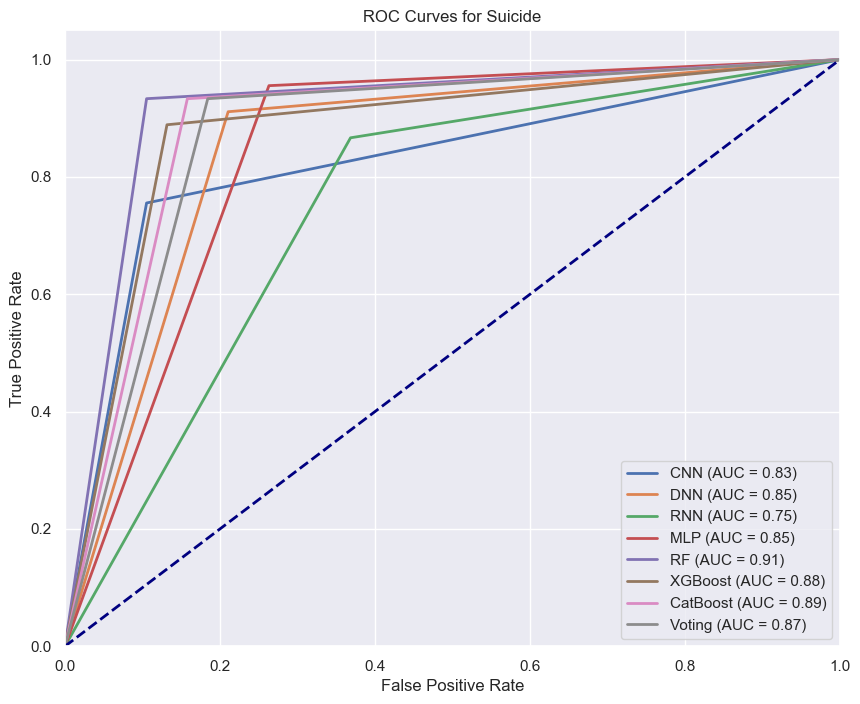

In [45]:
plot_all_roc_curves(predictions, 2, 'Suicide')

## Depression as Target

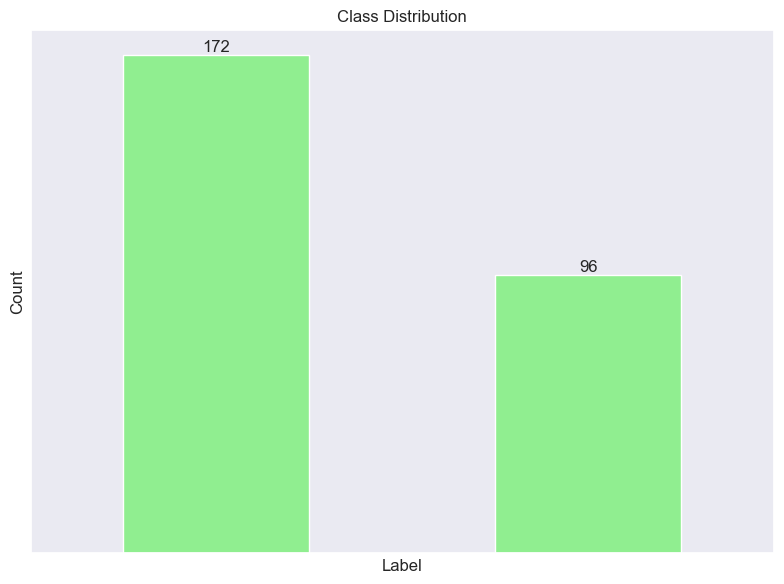

In [46]:
class_distribution(df2, 'Dep')

In [47]:
dep_df2 = SMOTE_resample(df2, 'Dep')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(dep_df2, 'Dep')

(206, 49)
(206,)
(69, 49)
(69,)
(69, 49)
(69,)


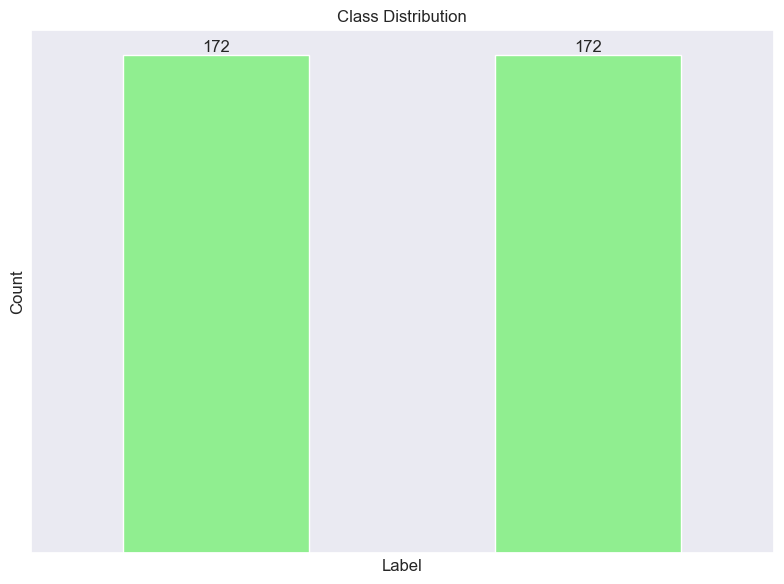

In [48]:
class_distribution(dep_df2, 'Dep')

### Deep Learning

In [49]:
# CNN Depression
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\cnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4980 - loss: 0.8768 - val_accuracy: 0.6087 - val_loss: 0.7670
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5763 - loss: 0.7625 - val_accuracy: 0.7246 - val_loss: 0.7276
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6751 - loss: 0.6984 - val_accuracy: 0.6667 - val_loss: 0.6887
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6947 - loss: 0.6647 - val_accuracy: 0.7681 - val_loss: 0.6381
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7574 - loss: 0.5984 - val_accuracy: 0.8116 - val_loss: 0.5854
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6975 - loss: 0.6118 - val_accuracy: 0.7971 - val_loss: 0.5550
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7562 - loss: 0.5473 - val_accuracy: 0.8261 - val_loss: 0.4976
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7613

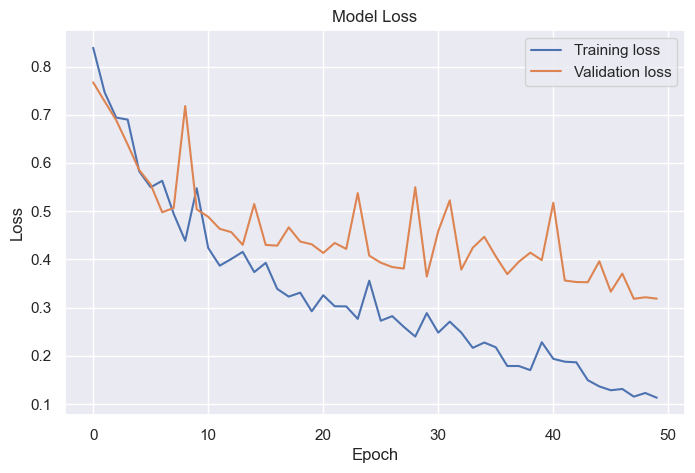

In [50]:
plot_history(cnn_hist)

In [51]:
# DNN Depression
dnn, best_param_dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\dnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5053 - loss: 1.4223 - val_accuracy: 0.4783 - val_loss: 1.2385
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5291 - loss: 1.2022 - val_accuracy: 0.7536 - val_loss: 1.0495
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6183 - loss: 1.0203 - val_accuracy: 0.5942 - val_loss: 0.9453
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7075 - loss: 0.8894 - val_accuracy: 0.7826 - val_loss: 0.7988
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7524 - loss: 0.7520 - val_accuracy: 0.7971 - val_loss: 0.6984
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7801 - loss: 0.7050 - val_accuracy: 0.7826 - val_loss: 0.6629
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7836 - loss: 0.6605 - val_accuracy: 0.8406 - val_loss: 0.6084
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy:

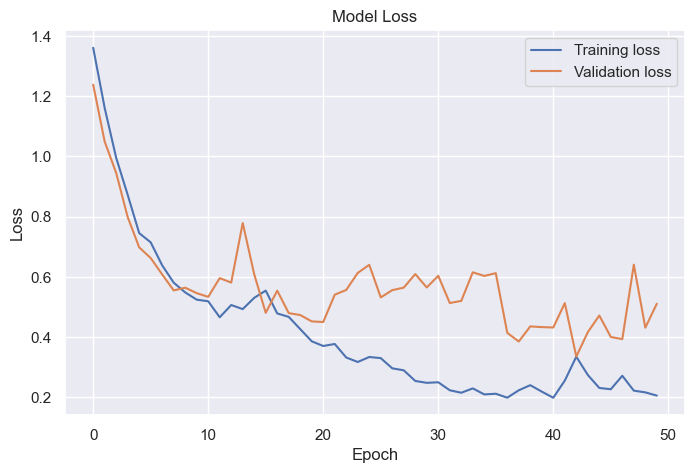

In [52]:
plot_history(dnn_hist)

In [53]:
# RNN Depression
rnn, best_param_rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\rnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4605 - loss: 0.7097 - val_accuracy: 0.5217 - val_loss: 0.7018
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5892 - loss: 0.6728 - val_accuracy: 0.6232 - val_loss: 0.6754
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6139 - loss: 0.6621 - val_accuracy: 0.5942 - val_loss: 0.6545
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6211 - loss: 0.6528 - val_accuracy: 0.6812 - val_loss: 0.6542
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6571 - loss: 0.6412 - val_accuracy: 0.6667 - val_loss: 0.6428
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6648 - loss: 0.6245 - val_accuracy: 0.6957 - val_loss: 0.6529
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6377 - loss: 0.6347 - val_accuracy: 0.6087 - val_loss: 0.6593
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6406

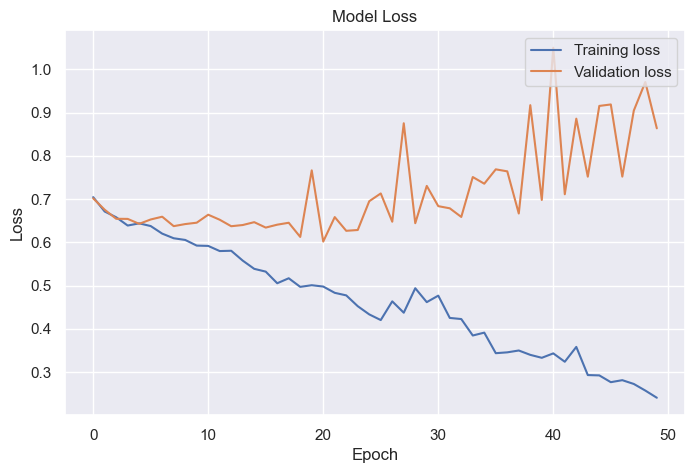

In [54]:
plot_history(rnn_hist)

In [55]:
# MLP Depression
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\mlp_hyperparameter_tuning2\tuner0.json
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3869 - loss: 1.2474 - val_accuracy: 0.7536 - val_loss: 0.7485
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6466 - loss: 0.8118 - val_accuracy: 0.7536 - val_loss: 0.6827
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7193 - loss: 0.6767 - val_accuracy: 0.7536 - val_loss: 0.7266
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7551 - loss: 0.6486 - val_accuracy: 0.7101 - val_loss: 0.6946
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7922 - loss: 0.5713 - val_accuracy: 0.8406 - val_loss: 0.6414
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7503 - loss: 0.5777 - val_accuracy: 0.7681 - val_loss: 0.6005
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8526 - loss: 0.4700 - val_accuracy: 0.7681 - val_loss: 0.5834
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8534

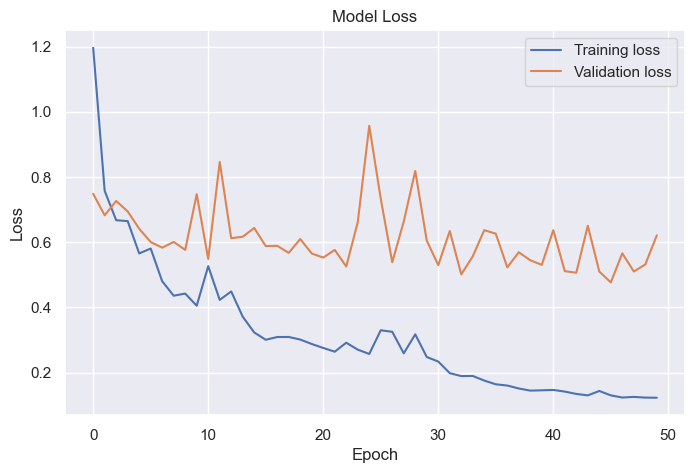

In [56]:
plot_history(mlp_hist)

### Ensemble Learning

In [57]:
# Random Forest Depression
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [58]:
# XGBoost Depression
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [59]:
# Catboost Depression
cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 0.6804095	total: 3.06ms	remaining: 150ms
1:	learn: 0.6683780	total: 6.06ms	remaining: 145ms
2:	learn: 0.6564933	total: 8.81ms	remaining: 138ms
3:	learn: 0.6433962	total: 11.4ms	remaining: 131ms
4:	learn: 0.6310312	total: 14.3ms	remaining: 129ms
5:	learn: 0.6268250	total: 16.9ms	remaining: 124ms
6:	learn: 0.6124382	total: 19.6ms	remaining: 121ms
7:	learn: 0.6020578	total: 22.5ms	remaining: 118ms
8:	learn: 0.5886755	total: 25ms	remaining: 114ms
9:	learn: 0.5756588	total: 27.9ms	remaining: 111ms
10:	learn: 0.5629209	total: 30.5ms	remaining: 108ms
11:	learn: 0.5505485	total: 33.3ms	remaining: 106ms
12:	learn: 0.5423338	total: 35.9ms	remaining: 102ms
13:	learn: 0.5321371	total: 38.7ms	remaining: 99.6ms
14:	learn: 0.5207079	total: 41.4ms	remaining: 96.6ms
15:	learn: 0.5113780	total: 44ms	remaining: 93.5ms
16:	learn: 0.5006205	total: 46.8ms	remaining: 90.8ms
17:	learn: 0.4910654	total: 49.1ms	remaining: 87.2ms
18:	learn: 0.4830578	total: 52ms	remaining: 84.9ms
19:	learn: 0.4746258	t

In [60]:
# Soft Voting Depression
sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.005248
0:	learn: 0.6850627	total: 16.4ms	remaining: 16.4s
1:	learn: 0.6769931	total: 18.9ms	remaining: 9.41s
2:	learn: 0.6681816	total: 21.1ms	remaining: 7.01s
3:	learn: 0.6611859	total: 23.5ms	remaining: 5.85s
4:	learn: 0.6538343	total: 26.1ms	remaining: 5.2s
5:	learn: 0.6468918	total: 28.5ms	remaining: 4.73s
6:	learn: 0.6398307	total: 31.3ms	remaining: 4.44s
7:	learn: 0.6340957	total: 33.9ms	remaining: 4.21s
8:	learn: 0.6270179	total: 36.3ms	remaining: 4s
9:	learn: 0.6209258	total: 38.8ms	remaining: 3.84s
10:	learn: 0.6159498	total: 41.3ms	remaining: 3.71s
11:	learn: 0.6100811	total: 43.8ms	remaining: 3.6s
12:	learn: 0.6034154	total: 45.2ms	remaining: 3.43s
13:	learn: 0.5968419	total: 46.7ms	remaining: 3.29s
14:	learn: 0.5893095	total: 49ms	remaining: 3.22s
15:	learn: 0.5828329	total: 51.4ms	remaining: 3.16s
16:	learn: 0.5765586	total: 52.9ms	remaining: 3.06s
17:	learn: 0.5698162	total: 55.1ms	remaining: 3s
18:	learn: 0.5628467	total: 57.5ms	remaining: 2.97s
19

### Store Results

In [61]:
# Store results to dictionaries Depression
predictions[2]['Depression'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[2]['Depression'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[2]['Depression'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[2]['Depression'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[2]['Depression'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[2]['Depression'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[2]['Depression'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[2]['Depression'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [62]:
for model in predictions[2]['Depression'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[2]['Depression'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.8260869383811951
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
           

### Error Analysis

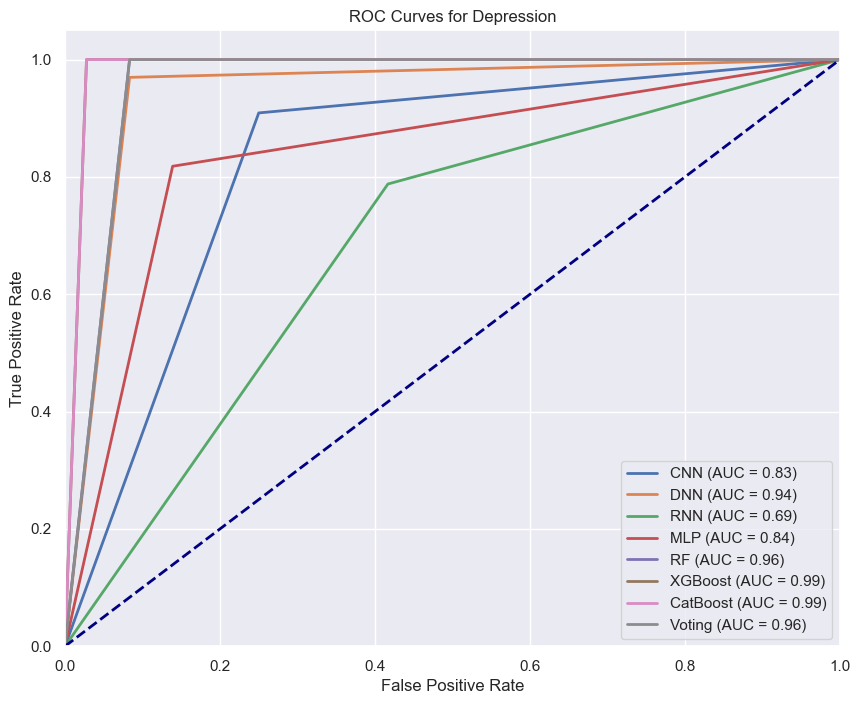

In [63]:
plot_all_roc_curves(predictions, 2, 'Depression')

## Depression Severity as Target

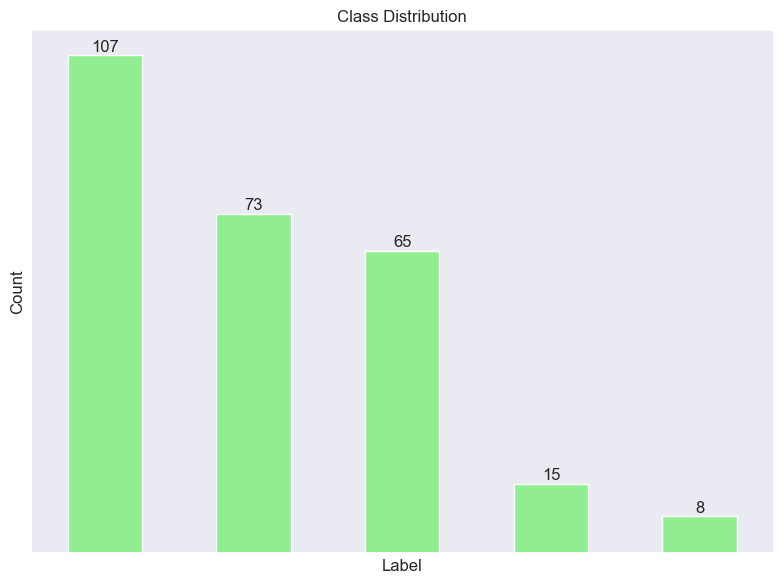

In [64]:
class_distribution(df2, 'DepSev')

In [65]:
depsev_df2 = SMOTE_resample(df2, 'DepSev')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(depsev_df2, 'DepSev')

(321, 49)
(321,)
(107, 49)
(107,)
(107, 49)
(107,)


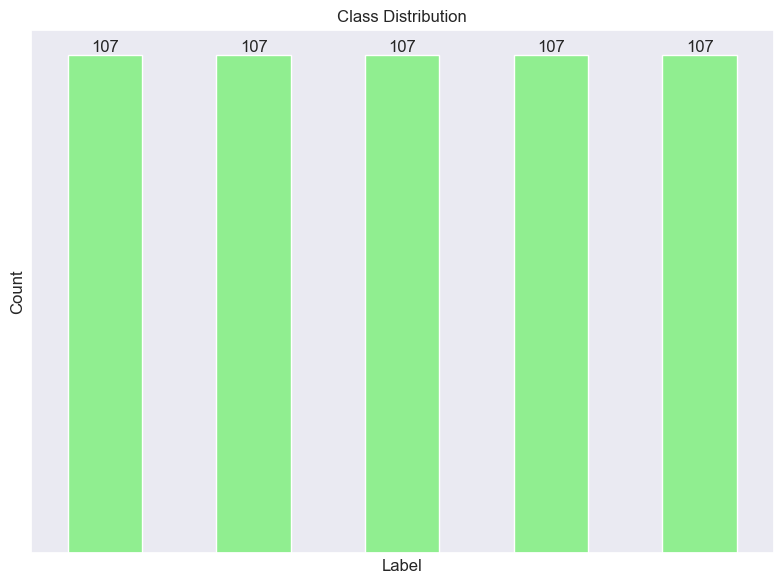

In [66]:
class_distribution(depsev_df2, 'DepSev')

### Deep Learning

In [67]:
# CNN Depression Severity
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\cnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1778 - loss: 1.7603 - val_accuracy: 0.1402 - val_loss: 1.7180
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3358 - loss: 1.5225 - val_accuracy: 0.2430 - val_loss: 1.4631
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4134 - loss: 1.3474 - val_accuracy: 0.3551 - val_loss: 1.3492
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4619 - loss: 1.2187 - val_accuracy: 0.4860 - val_loss: 1.2315
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5173 - loss: 1.1889 - val_accuracy: 0.6542 - val_loss: 1.0775
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6851 - loss: 1.0129 - val_accuracy: 0.7196 - val_loss: 0.9573
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7077 - loss: 0.9041 - val_accuracy: 0.7383 - val_loss: 0.9327
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

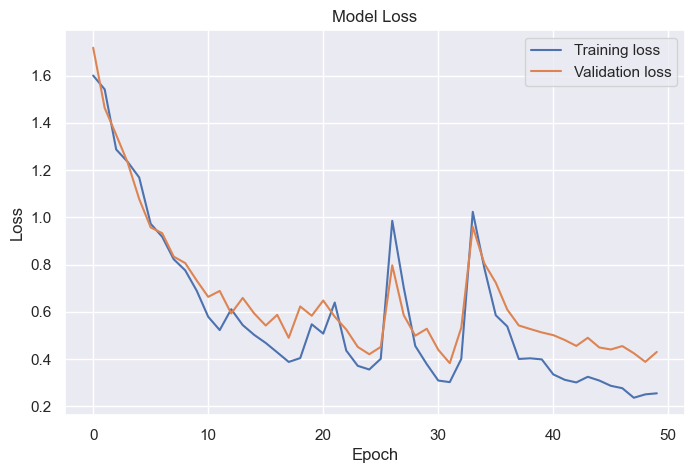

In [68]:
plot_history(cnn_hist)

In [69]:
# DNN Depression Severity
dnn, best_param_dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num=2)

Reloading Tuner from dir2\dnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2090 - loss: 2.4703 - val_accuracy: 0.1308 - val_loss: 2.1647
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2426 - loss: 2.0573 - val_accuracy: 0.1308 - val_loss: 1.9790
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2439 - loss: 1.8773 - val_accuracy: 0.1308 - val_loss: 1.8580
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2885 - loss: 1.7374 - val_accuracy: 0.3178 - val_loss: 1.6708
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4277 - loss: 1.5797 - val_accuracy: 0.3832 - val_loss: 1.5149
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4857 - loss: 1.4190 - val_accuracy: 0.4112 - val_loss: 1.4976
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4893 - loss: 1.3649 - val_accuracy: 0.5421 - val_loss: 1.3194
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

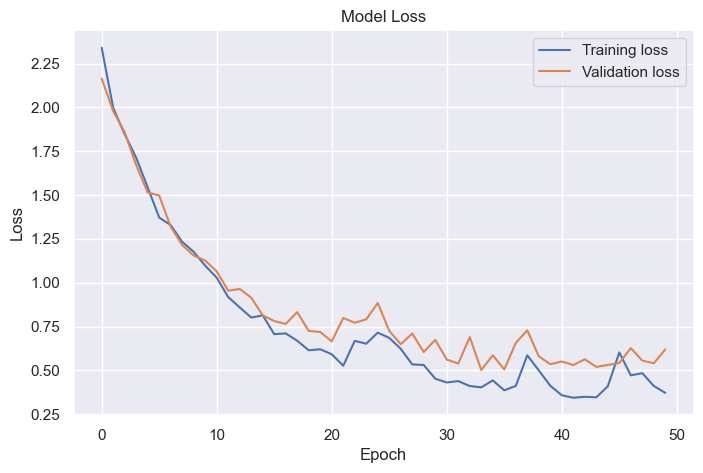

In [70]:
plot_history(dnn_hist)

In [71]:
# RNN Depression Severity
rnn, best_param_rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num = 2)

Reloading Tuner from dir2\rnn_hyperparameter_tuning2\tuner0.json
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2083 - loss: 1.6064 - val_accuracy: 0.2804 - val_loss: 1.5837
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3875 - loss: 1.4906 - val_accuracy: 0.2897 - val_loss: 1.5385
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4178 - loss: 1.4470 - val_accuracy: 0.3458 - val_loss: 1.5093
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4241 - loss: 1.3963 - val_accuracy: 0.3458 - val_loss: 1.5177
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4112 - loss: 1.3818 - val_accuracy: 0.3738 - val_loss: 1.4872
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4603 - loss: 1.3144 - val_accuracy: 0.3645 - val_loss: 1.4696
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4529 - loss: 1.3055 - val_accuracy: 0.3551 - val_loss: 1.5029
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

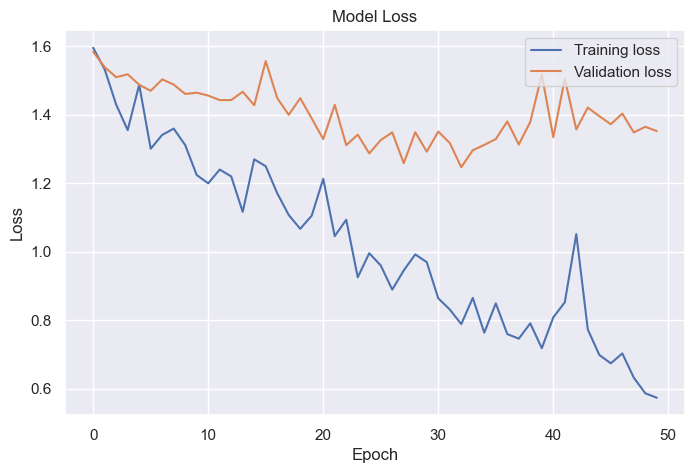

In [72]:
plot_history(rnn_hist)

In [73]:
# MLP Depression Severity
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid, dataset_num = 2)

Reloading Tuner from dir2\mlp_hyperparameter_tuning2\tuner0.json
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3374 - loss: 1.7823 - val_accuracy: 0.3364 - val_loss: 1.5154
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4695 - loss: 1.3124 - val_accuracy: 0.5794 - val_loss: 1.5574
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 1.0733 - val_accuracy: 0.6542 - val_loss: 1.1220
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 0.8998 - val_accuracy: 0.6449 - val_loss: 0.9108
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7258 - loss: 0.7458 - val_accuracy: 0.6822 - val_loss: 0.8851
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.6424 - val_accuracy: 0.6916 - val_loss: 0.8475
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.6750 - val_accuracy: 0.8037 - val_loss: 0.7002
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

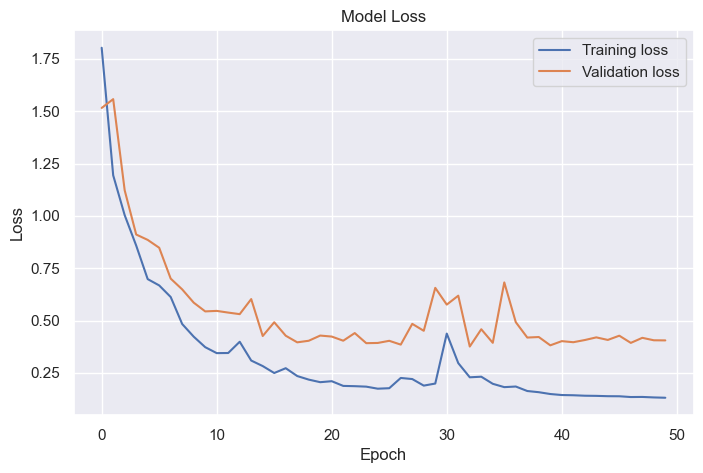

In [74]:
plot_history(mlp_hist)

### Ensemble Learning

In [75]:
# Random Forest Depression Severity
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [76]:
# XGBoost Depression Severity
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [77]:
# Catboost Depression Severity
cat, best_param_cat, y_pred_cat, cat_accuracy  = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 1.5796310	total: 5ms	remaining: 245ms
1:	learn: 1.5608562	total: 10.7ms	remaining: 257ms
2:	learn: 1.5416607	total: 14.3ms	remaining: 224ms
3:	learn: 1.5247040	total: 19.4ms	remaining: 223ms
4:	learn: 1.5020441	total: 24.9ms	remaining: 224ms
5:	learn: 1.4894367	total: 30.4ms	remaining: 223ms
6:	learn: 1.4775946	total: 35.6ms	remaining: 219ms
7:	learn: 1.4645758	total: 41.2ms	remaining: 216ms
8:	learn: 1.4550930	total: 46.5ms	remaining: 212ms
9:	learn: 1.4460949	total: 51.9ms	remaining: 207ms
10:	learn: 1.4265153	total: 57.6ms	remaining: 204ms
11:	learn: 1.4083004	total: 63.4ms	remaining: 201ms
12:	learn: 1.3974110	total: 66.7ms	remaining: 190ms
13:	learn: 1.3857667	total: 70.5ms	remaining: 181ms
14:	learn: 1.3684737	total: 75ms	remaining: 175ms
15:	learn: 1.3609190	total: 79.6ms	remaining: 169ms
16:	learn: 1.3487142	total: 84.3ms	remaining: 164ms
17:	learn: 1.3364500	total: 88.5ms	remaining: 157ms
18:	learn: 1.3230916	total: 92.9ms	remaining: 152ms
19:	learn: 1.3147063	total:

In [78]:
# Soft Voting Depression Severity
param_grid_sv = {
    'voting': ['soft'],
    'estimators': [{'rf': rf, 'xgb': xgb, 'cat': cat}],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}

sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.074672
0:	learn: 1.4975524	total: 4.93ms	remaining: 4.92s
1:	learn: 1.3500654	total: 10.6ms	remaining: 5.29s
2:	learn: 1.2439254	total: 16.5ms	remaining: 5.47s
3:	learn: 1.1992579	total: 26.8ms	remaining: 6.67s
4:	learn: 1.0939918	total: 32.4ms	remaining: 6.46s
5:	learn: 1.0256680	total: 38.5ms	remaining: 6.38s
6:	learn: 0.9792818	total: 45ms	remaining: 6.39s
7:	learn: 0.9278877	total: 50.9ms	remaining: 6.31s
8:	learn: 0.8632148	total: 56.5ms	remaining: 6.21s
9:	learn: 0.8015158	total: 62.1ms	remaining: 6.15s
10:	learn: 0.7619450	total: 68.6ms	remaining: 6.17s
11:	learn: 0.7050125	total: 75ms	remaining: 6.17s
12:	learn: 0.6812715	total: 81ms	remaining: 6.15s
13:	learn: 0.6475810	total: 86.1ms	remaining: 6.07s
14:	learn: 0.6115416	total: 90.4ms	remaining: 5.93s
15:	learn: 0.5857813	total: 94.9ms	remaining: 5.84s
16:	learn: 0.5524486	total: 100ms	remaining: 5.8s
17:	learn: 0.5399134	total: 105ms	remaining: 5.73s
18:	learn: 0.5087773	total: 110ms	remaining: 5.66s
19

### Store Results

In [79]:
# Store results to dictionaries Depression Severity
predictions[2]['Depression_Severity'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[2]['Depression_Severity'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[2]['Depression_Severity'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[2]['Depression_Severity'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[2]['Depression_Severity'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[2]['Depression_Severity'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[2]['Depression_Severity'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[2]['Depression_Severity'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [80]:
for model in predictions[2]['Depression_Severity'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[2]['Depression_Severity'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.9158878326416016
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
           

# Performance Evaluation

## Accuracy Comparison

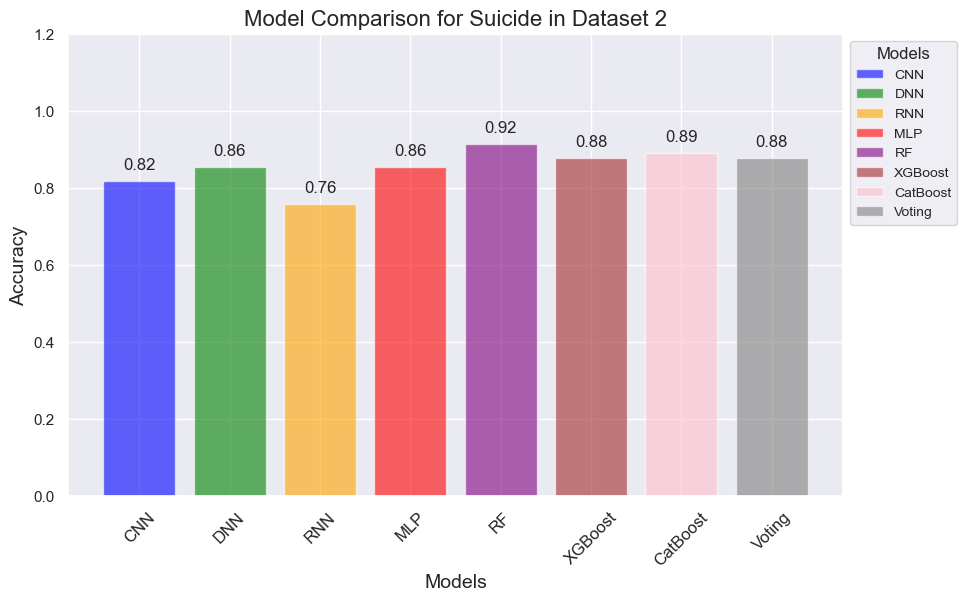

In [81]:
# Plotting the comparison of Suicide models in Dataset 2
plot_comparison(predictions, 2, 'Suicide')

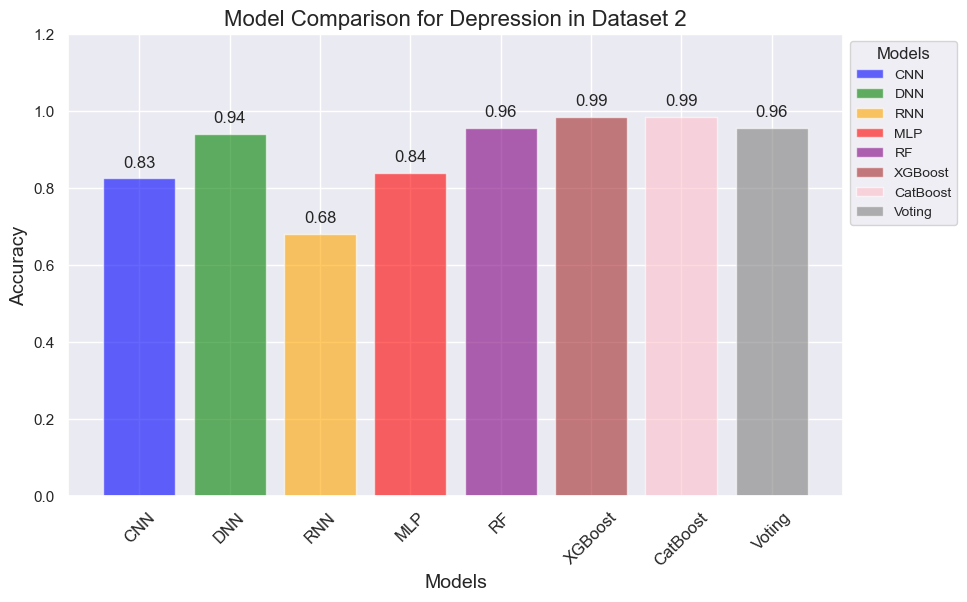

In [82]:
# Plotting the comparison of Depression models in Dataset 2
plot_comparison(predictions, 2, 'Depression')

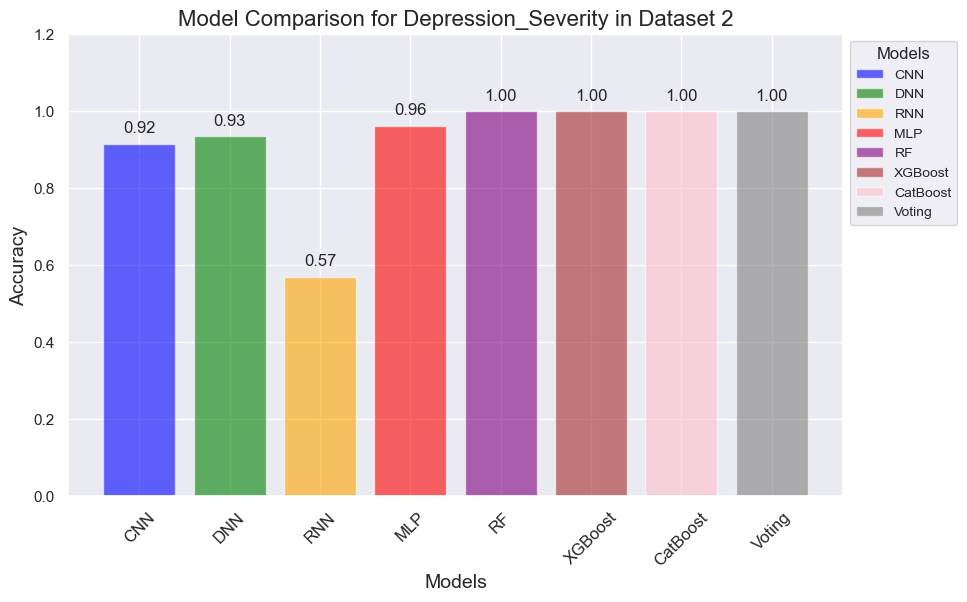

In [83]:
# Plotting the comparison of Depression models in Dataset 2
plot_comparison(predictions, 2, 'Depression_Severity')

## Confusion Matrix comparison

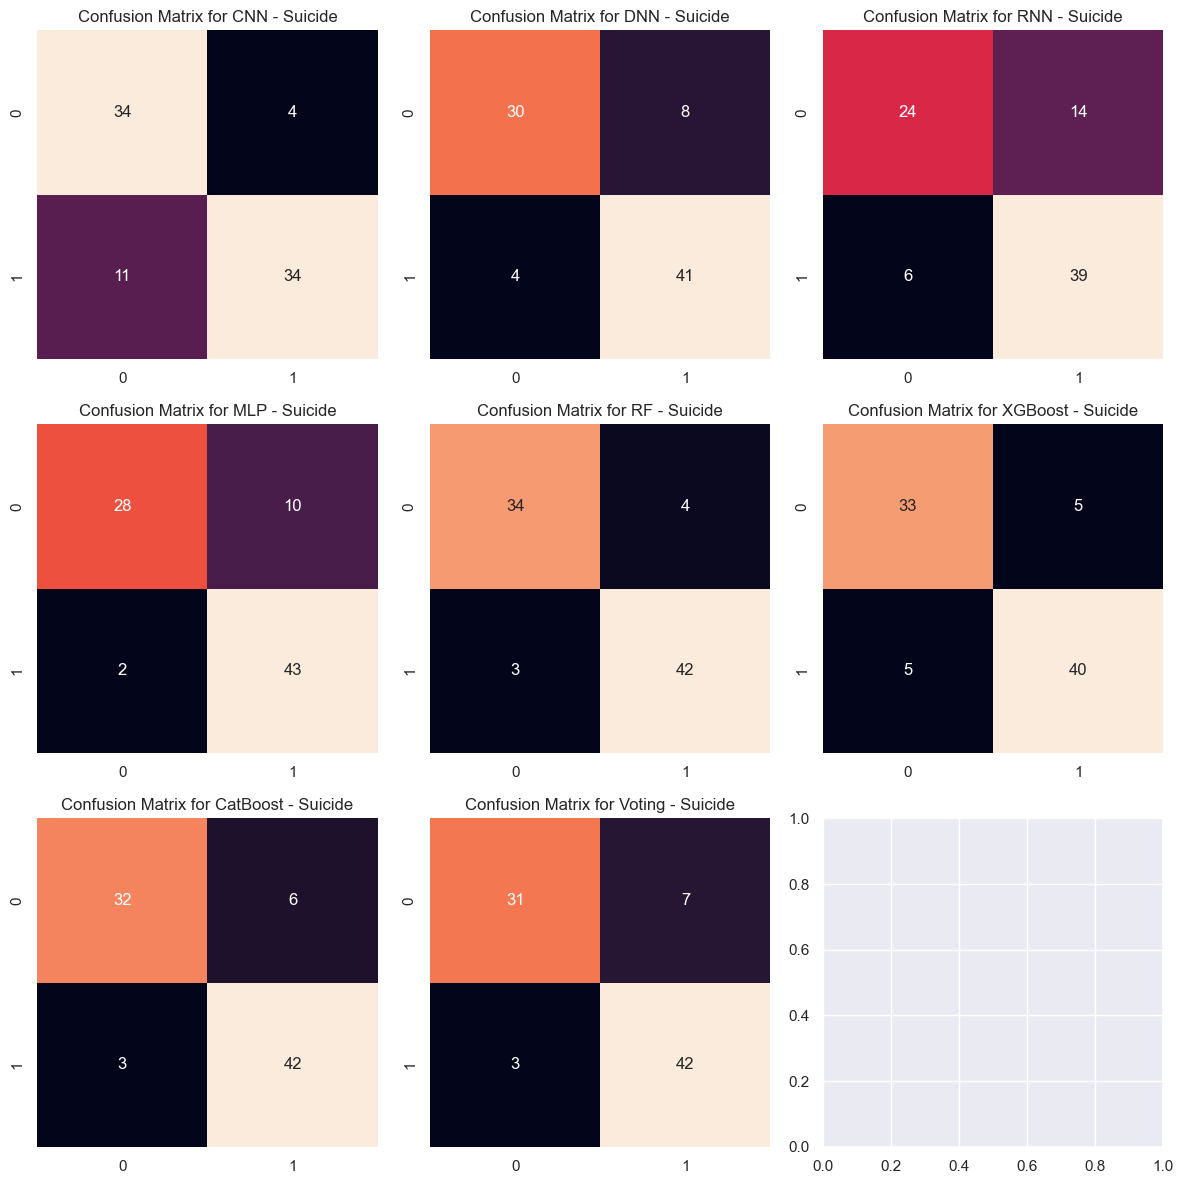

In [84]:
# Plotting confusion matrices of Suicide models in Dataset 2
plot_confusion_matrices(predictions, 2, 'Suicide')

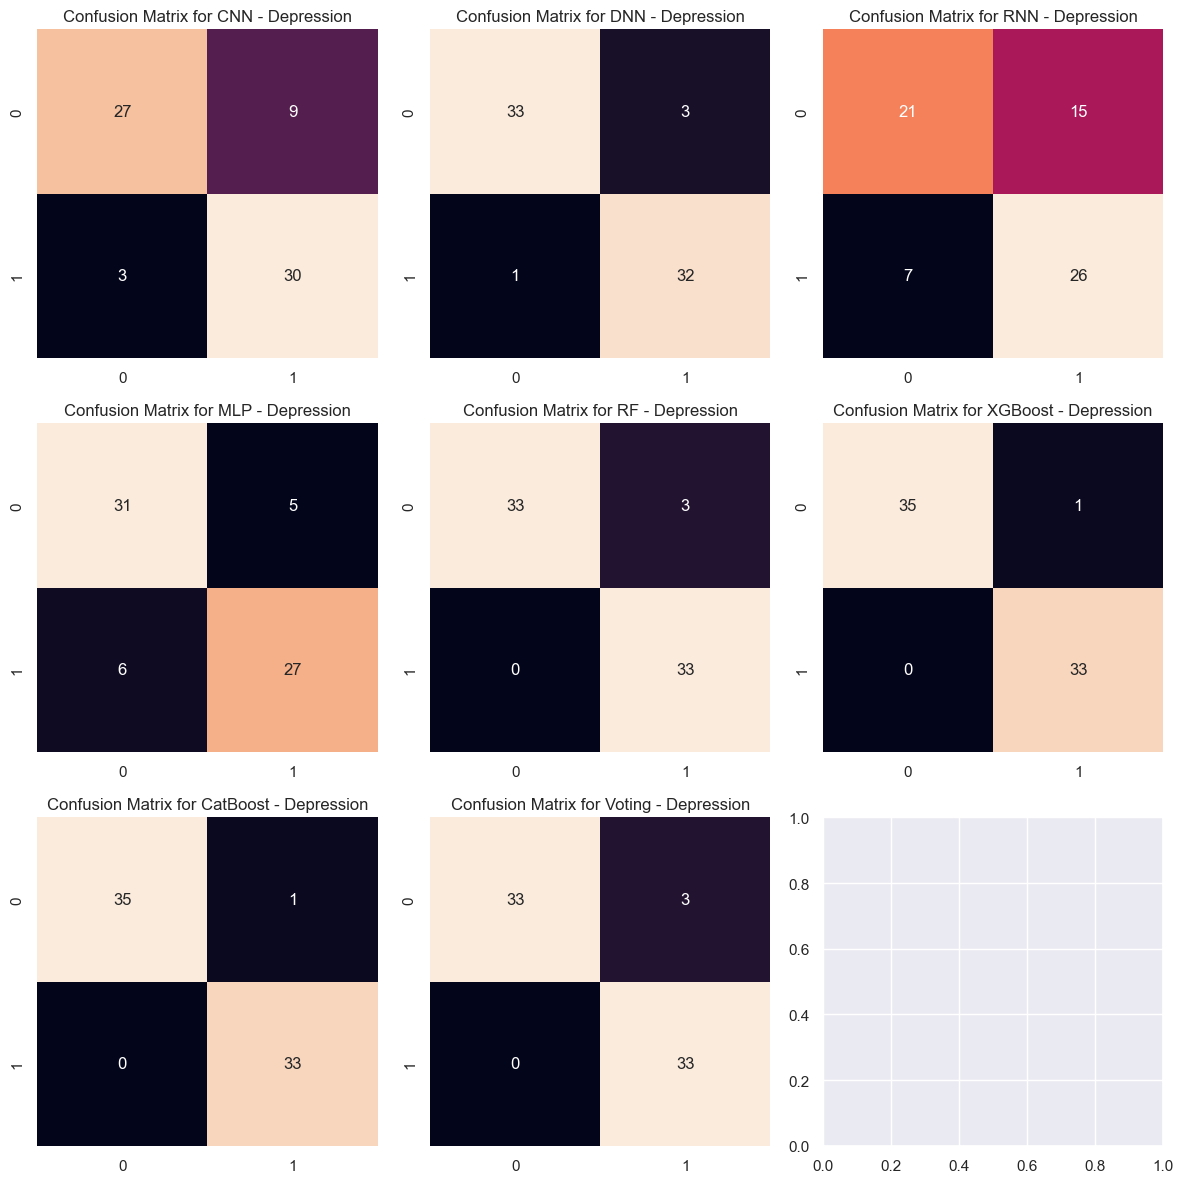

In [85]:
# Plotting confusion matrices of Depression models in Dataset 2
plot_confusion_matrices(predictions, 2, 'Depression')

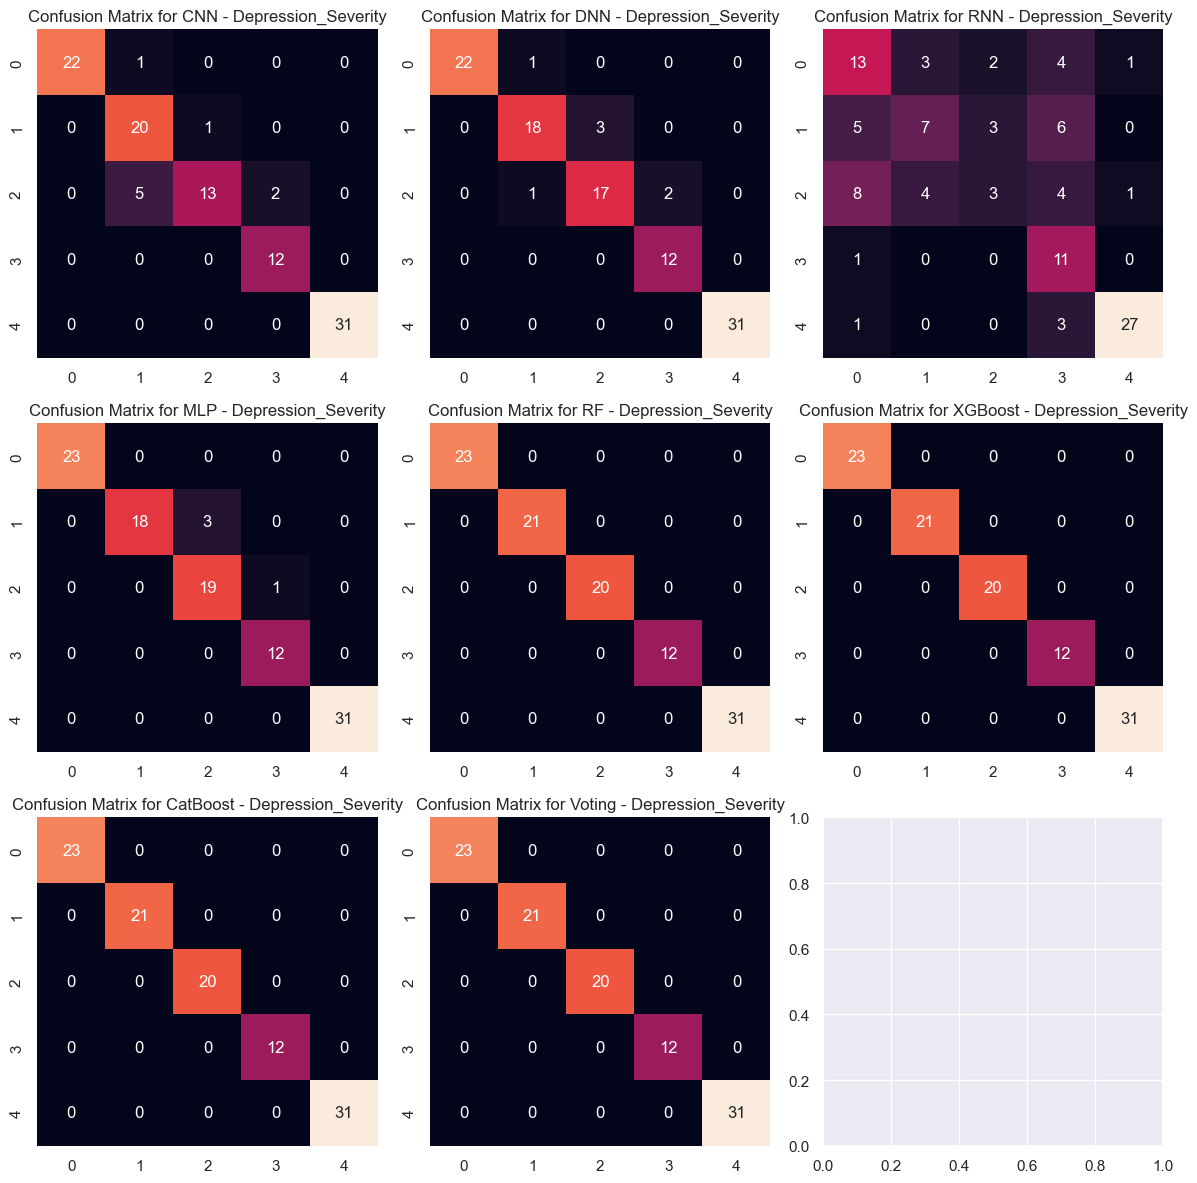

In [86]:
# Plotting confusion matrices of Depression_Severity models in Dataset 2
plot_confusion_matrices(predictions, 2, 'Depression_Severity')

## Feature Importance

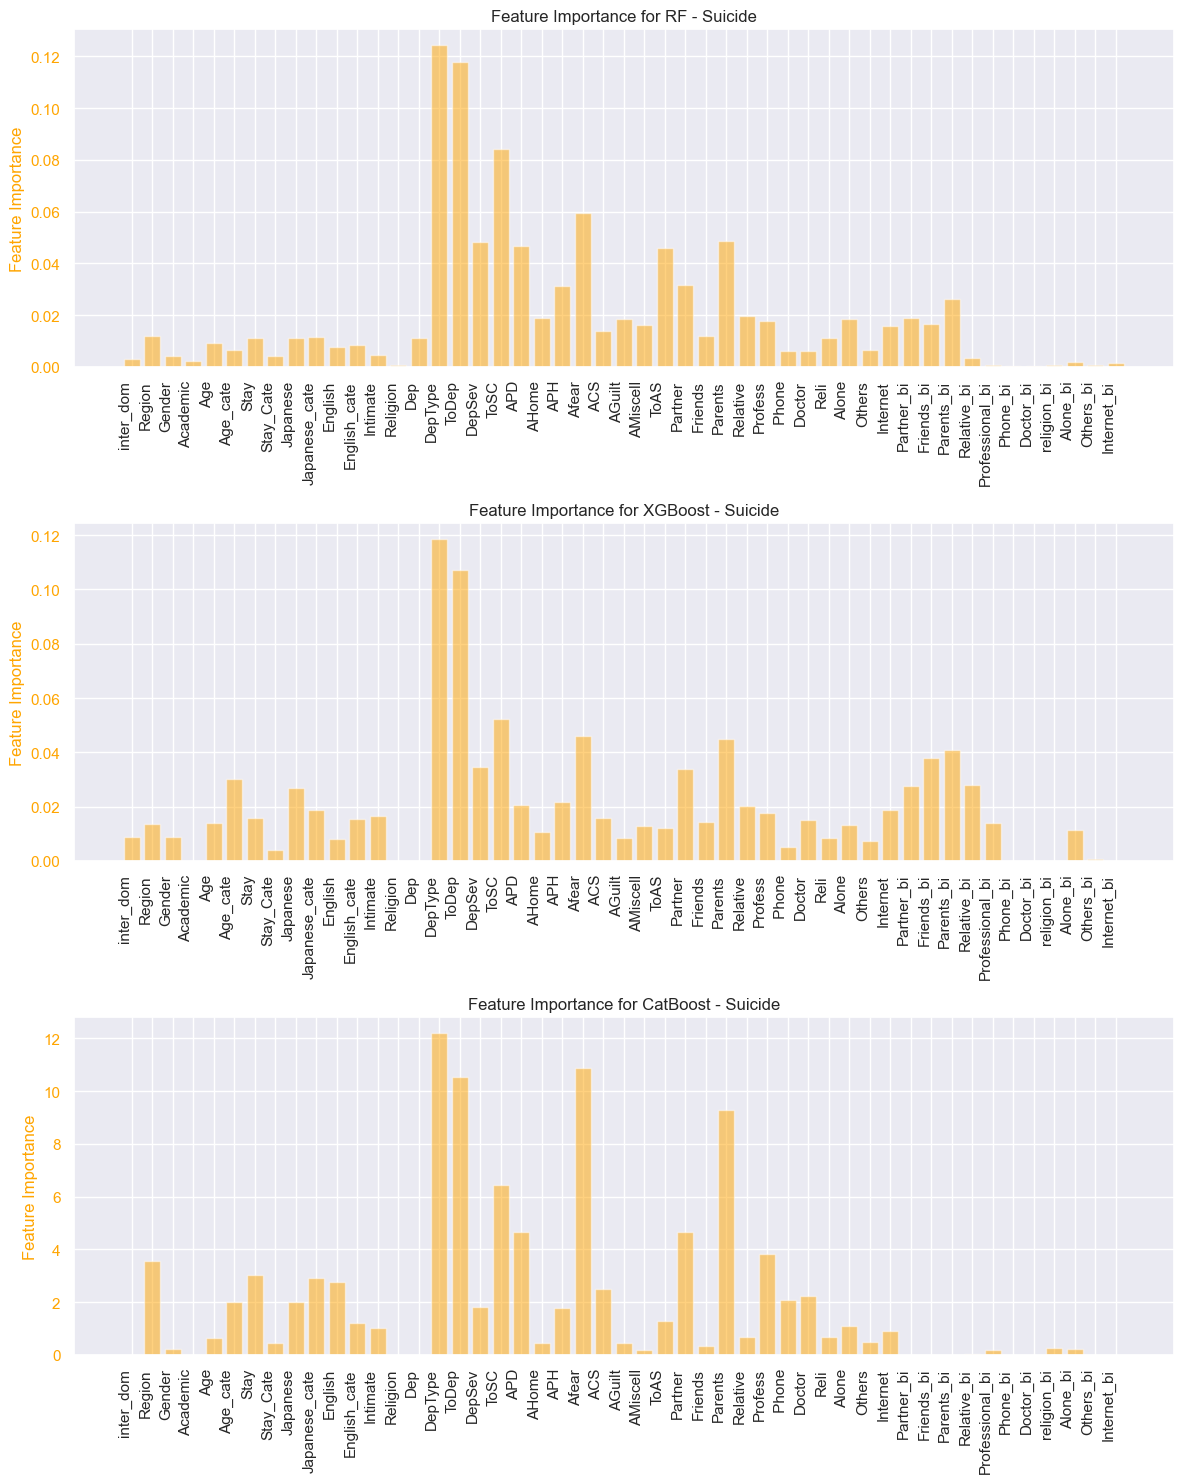

In [87]:
plot_feature_importance(predictions, 2, 'Suicide', suicide_df2.drop('Suicide', axis=1))

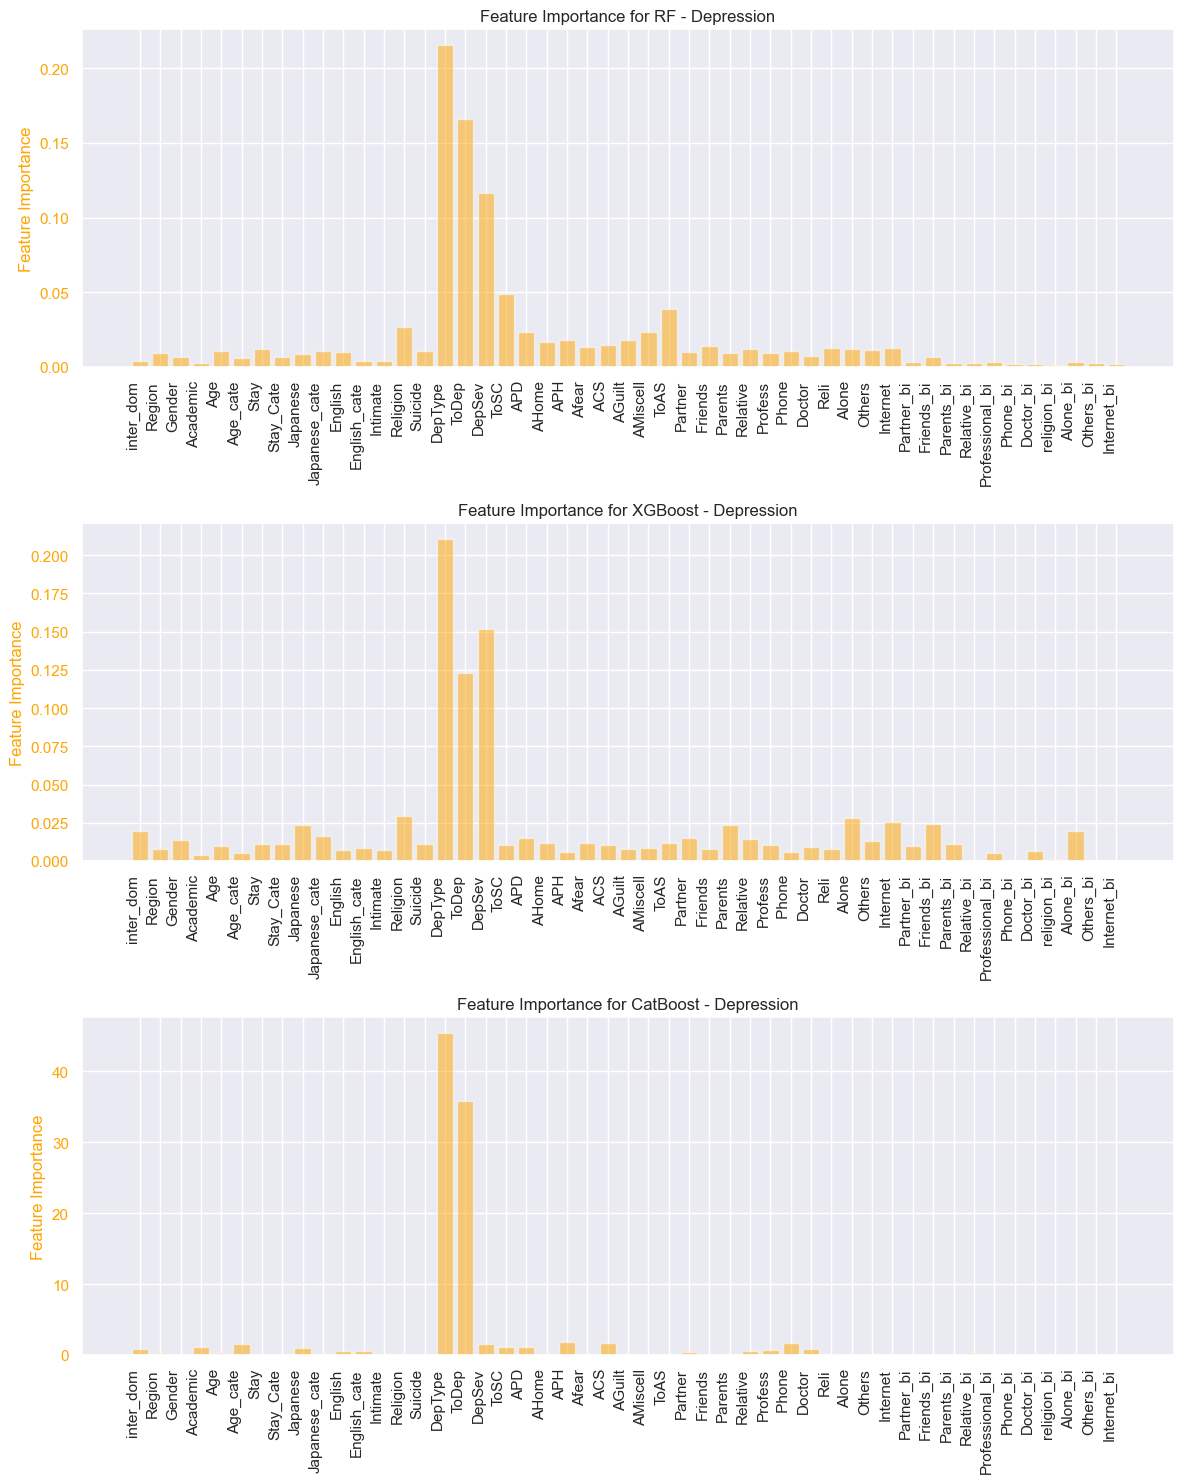

In [88]:
plot_feature_importance(predictions, 2, 'Depression', dep_df2.drop('Dep', axis=1))

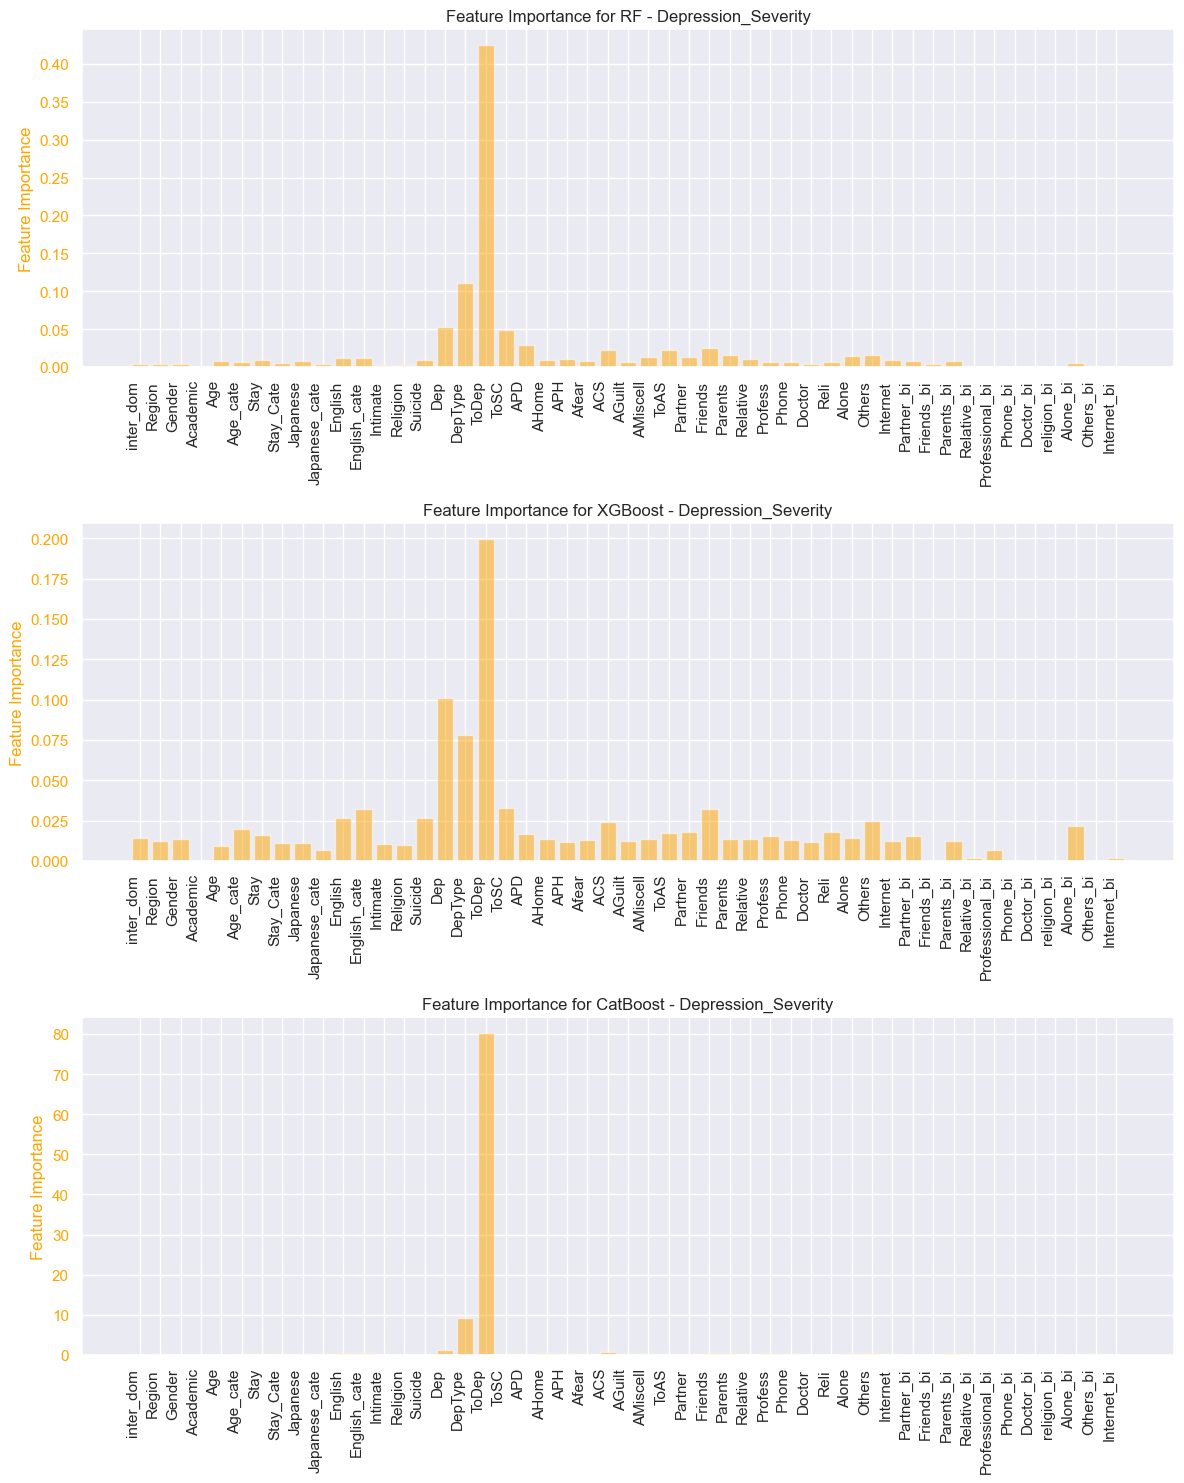

In [89]:
plot_feature_importance(predictions, 2, 'Depression_Severity', depsev_df2.drop('DepSev', axis=1))